# **GOLD PRICE ANALYSIS PROJECT (1994-2023)**

## **Data Understanding**

### 1. Deskripsi Dataset

* **Nama File**: `gold_1994-2023.xlsx`
* **Jumlah Baris**: 30
* **Jumlah Kolom**: 15
* **Periode Data**: 1994 – 2023
* **Topik Data**: Faktor makroekonomi dan komoditas yang berkaitan dengan **harga emas**.

---

### 2. Struktur Dataset

| Kolom        | Tipe Data | Keterangan                                     |
| ------------ | --------- | ---------------------------------------------- |
| `year`       | int64     | Tahun pengamatan (1994–2023)                   |
| `gold_price` | object    | Harga emas (perlu dibersihkan menjadi numerik) |
| `fed_rate`   | float64   | Suku bunga The Fed (%)                         |
| `inflation`  | float64   | Tingkat inflasi (%)                            |
| `ec_growth`  | float64   | Pertumbuhan ekonomi (%)                        |
| `exch_rate`  | float64   | Nilai tukar Rupiah per USD                     |
| `real_int`   | float64   | Suku bunga riil (%)                            |
| `gdp_def`    | float64   | Deflator PDB (%)                               |
| `cpo`        | float64   | Harga Crude Palm Oil (CPO)                     |
| `tin`        | float64   | Harga timah (Tin)                              |
| `lend_int`   | float64   | Suku bunga pinjaman (%)                        |
| `Aluminium`  | float64   | Harga aluminium                                |
| `Nickel`     | float64   | Harga nikel                                    |
| `Platinum`   | float64   | Harga platinum                                 |
| `Perak`      | float64   | Harga perak (silver)                           |

---

### 3. Kualitas Data

* **Missing Values**: Tidak ada missing values di semua kolom.
* **Inconsistent Data**:

  * `gold_price` masih dalam format **object**, kemungkinan mengandung tanda pemisah ribuan/koma → perlu dikonversi ke numerik.

---

### 4. Statistik Deskriptif

#### a. Variabel Utama (contoh ringkasan)

* **Tahun (`year`)**: 1994 – 2023
* **Harga Emas (`gold_price`)**: 30 nilai unik (setiap tahun berbeda, perlu dibersihkan)
* **Fed Rate (`fed_rate`)**: Rata-rata 2.47%, min 0.08%, max 6.24%
* **Inflasi (`inflation`)**: Rata-rata 8.48%, min 1.56%, max 58.45%
* **Pertumbuhan Ekonomi (`ec_growth`)**: Rata-rata 4.44%, min -13.12%, max 8.22%

#### b. Variabel Komoditas (contoh ringkasan)

* **CPO**: Rata-rata 54.9
* **Timah (`tin`)**: Rata-rata 14,534
* **Aluminium**: Rata-rata 1,884
* **Nikel**: Rata-rata 14,304
* **Platinum**: Rata-rata 934
* **Perak (Silver)**: Rata-rata 14.8

---

### 5. Insight Awal

* Dataset berfokus pada **hubungan harga emas** dengan faktor makroekonomi dan harga komoditas lain.
* Potensi analisis:

  * Korelasi harga emas dengan inflasi, suku bunga, nilai tukar.
  * Hubungan harga emas dengan komoditas lain (CPO, timah, aluminium, nikel, platinum, perak).

---

In [ ]:
import os
import gdown

# Buat folder data jika belum ada
os.makedirs("data", exist_ok=True)

# Link Google Drive (ubah ke format file-id)
url = "https://drive.google.com/uc?id=12DTi1juIAjzv7QL1oFzsMaubsa9kJQhO"
output = "data/gold_1994-2023.xlsx"

# Download hanya jika file belum ada
if not os.path.exists(output):
    gdown.download(url, output, quiet=False)
    print(f"File berhasil diunduh dan disimpan di {output}")
else:
    print(f"File sudah ada di {output}, skip download.")

In [1]:
# ============================================================================
# IMPORT LIBRARIES
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Tests
from scipy import stats
from scipy.stats import normaltest, shapiro, jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Time Series
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen

from arch import arch_model

# Machine Learning
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Deep Learning (if tensorflow available)
try:
    from tensorflow import keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
    from tensorflow.keras.callbacks import EarlyStopping
    KERAS_AVAILABLE = True
except:
    KERAS_AVAILABLE = False
    print("TensorFlow/Keras not available. LSTM, ANN, and CNN-LSTM models will be skipped.")

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Warning Handling
import warnings
warnings.filterwarnings('ignore')

d:\Projects\Bu Lina\Gold Price Prediction\.venv\lib\site-packages\property_cached\__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
# ============================================================================
# 0.1 DATA UNDERSTANDING
# ============================================================================

print("="*80)
print("0.1 DATA UNDERSTANDING")
print("="*80)

# Load data
df = pd.read_excel('data/gold_1994-2023.xlsx')

print("\n0.1.1 DESKRIPSI DATASET")
print("-"*80)
print(f"Nama File: gold_1994-2023.xlsx")
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
print(f"Periode Data: {df['year'].min()} - {df['year'].max()}")

print("\n0.1.2 STRUKTUR DATASET")
print("-"*80)
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

0.1 DATA UNDERSTANDING

0.1.1 DESKRIPSI DATASET
--------------------------------------------------------------------------------
Nama File: gold_1994-2023.xlsx
Jumlah Baris: 30
Jumlah Kolom: 16
Periode Data: 1994 - 2023

0.1.2 STRUKTUR DATASET
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         30 non-null     int64  
 1   gold_price   30 non-null     float64
 2   fed_rate     30 non-null     float64
 3   inflation    30 non-null     float64
 4   ec_growth    30 non-null     float64
 5   exch_rate    30 non-null     float64
 6   real_int     30 non-null     float64
 7   gdp_def      30 non-null     float64
 8   cpo          30 non-null     float64
 9   tin          30 non-null     float64
 10  lend_int     30 non-null     float64
 11  Aluminium    30 non-n

In [3]:
# Remove unnamed columns if any
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
# Clean gold_price column (remove comma/thousands separator)
if df['gold_price'].dtype == 'object':
    df['gold_price'] = df['gold_price'].str.replace(',', '').str.replace('.', '').astype(float)

print("\n0.1.3 KUALITAS DATA")
print("-"*80)
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

print("\n0.1.4 STATISTIK DESKRIPTIF")
print("-"*80)
print(df.describe())


0.1.3 KUALITAS DATA
--------------------------------------------------------------------------------
Missing Values:
year          0
gold_price    0
fed_rate      0
inflation     0
ec_growth     0
exch_rate     0
real_int      0
gdp_def       0
cpo           0
tin           0
lend_int      0
Aluminium     0
Nickel        0
Platinum      0
Perak         0
dtype: int64

Total Missing Values: 0

0.1.4 STATISTIK DESKRIPTIF
--------------------------------------------------------------------------------
              year   gold_price  fed_rate  inflation  ec_growth     exch_rate  \
count    30.000000    30.000000  30.00000  30.000000  30.000000     30.000000   
mean   2008.500000   935.523338   2.46600   8.481230   4.438370   9938.259521   
std       8.803408   573.425888   2.21228  10.233847   3.821554   3754.664354   
min    1994.000000   270.989167   0.08000   1.560130 -13.126725   2160.753675   
25%    2001.250000   384.048542   0.22750   3.908965   4.720001   8812.537500   
50%    20

In [5]:
# Correlation with gold_price
print("\nKorelasi dengan Harga Emas:")
correlations = df.corr()['gold_price'].sort_values(ascending=False)
print(correlations)

print("\n0.1.5 INSIGHT AWAL")
print("-"*80)
print("✓ Dataset fokus pada hubungan harga emas dengan faktor makroekonomi")
print("✓ Periode analisis: 30 tahun (1994-2023)")
print("✓ Variabel ekonomi: Fed rate, inflasi, pertumbuhan ekonomi, nilai tukar")
print("✓ Variabel komoditas: CPO, timah, aluminium, nikel, platinum, perak")


Korelasi dengan Harga Emas:
gold_price    1.000000
tin           0.942993
year          0.922562
Perak         0.885612
cpo           0.753968
exch_rate     0.710543
Platinum      0.641273
Aluminium     0.561791
Nickel        0.507015
real_int      0.113259
ec_growth     0.091401
gdp_def      -0.423295
inflation    -0.442662
fed_rate     -0.619093
lend_int     -0.795449
Name: gold_price, dtype: float64

0.1.5 INSIGHT AWAL
--------------------------------------------------------------------------------
✓ Dataset fokus pada hubungan harga emas dengan faktor makroekonomi
✓ Periode analisis: 30 tahun (1994-2023)
✓ Variabel ekonomi: Fed rate, inflasi, pertumbuhan ekonomi, nilai tukar
✓ Variabel komoditas: CPO, timah, aluminium, nikel, platinum, perak


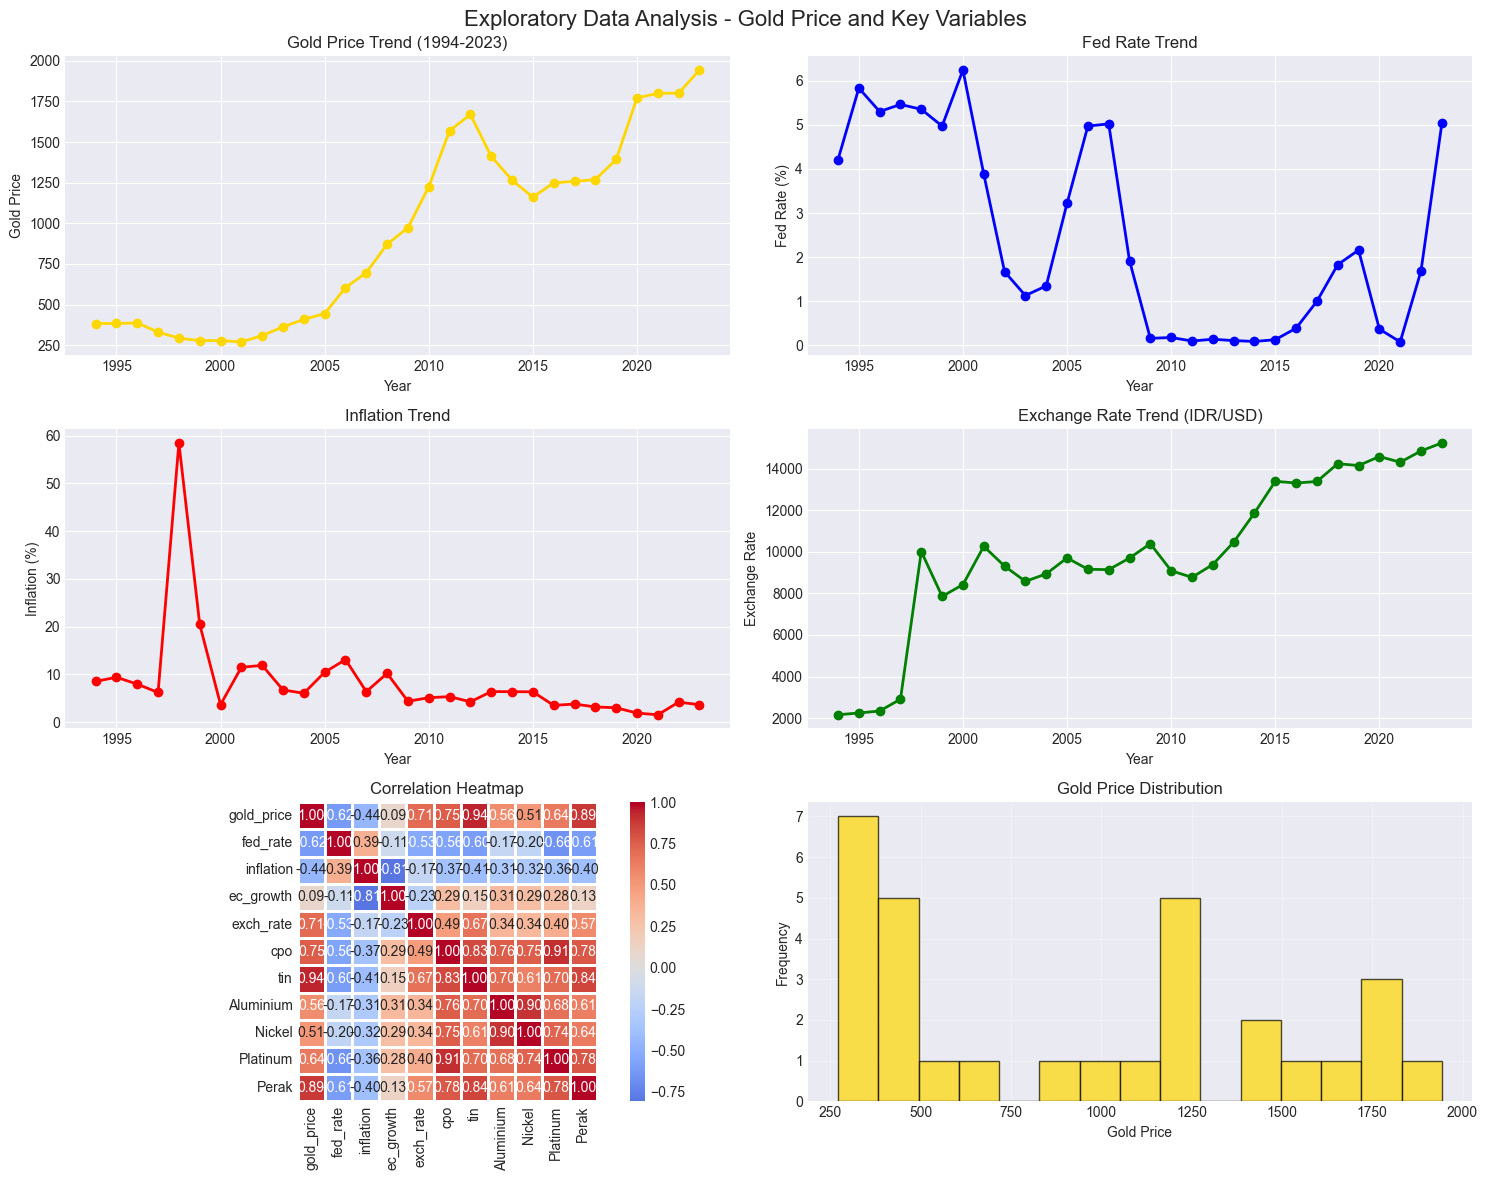

In [6]:
# Visualisasi
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Exploratory Data Analysis - Gold Price and Key Variables', fontsize=16)

# Gold price trend
axes[0, 0].plot(df['year'], df['gold_price'], marker='o', linewidth=2, color='gold')
axes[0, 0].set_title('Gold Price Trend (1994-2023)')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Gold Price')
axes[0, 0].grid(True)

# Fed rate
axes[0, 1].plot(df['year'], df['fed_rate'], marker='o', linewidth=2, color='blue')
axes[0, 1].set_title('Fed Rate Trend')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Fed Rate (%)')
axes[0, 1].grid(True)

# Inflation
axes[1, 0].plot(df['year'], df['inflation'], marker='o', linewidth=2, color='red')
axes[1, 0].set_title('Inflation Trend')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Inflation (%)')
axes[1, 0].grid(True)

# Exchange rate
axes[1, 1].plot(df['year'], df['exch_rate'], marker='o', linewidth=2, color='green')
axes[1, 1].set_title('Exchange Rate Trend (IDR/USD)')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Exchange Rate')
axes[1, 1].grid(True)

# Correlation heatmap (top variables)
top_vars = ['gold_price', 'fed_rate', 'inflation', 'ec_growth', 'exch_rate', 
            'cpo', 'tin', 'Aluminium', 'Nickel', 'Platinum', 'Perak']
corr_matrix = df[top_vars].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=axes[2, 0], square=True, linewidths=1)
axes[2, 0].set_title('Correlation Heatmap')

# Distribution of gold price
axes[2, 1].hist(df['gold_price'], bins=15, color='gold', edgecolor='black', alpha=0.7)
axes[2, 1].set_title('Gold Price Distribution')
axes[2, 1].set_xlabel('Gold Price')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## **Data Testing**

### Classic Test (Stationarity)

In [7]:
# ============================================================================
# 0.2 DATA TESTING
# ============================================================================

print("\n" + "="*80)
print("0.2 DATA TESTING")
print("="*80)

# Prepare variables
X = df.drop(['year', 'gold_price'], axis=1)
y = df['gold_price']

# Differencing 1x
y_diff = df['gold_price'].diff().dropna()

print("\n0.2.1 CLASSIC TEST (Stationarity)")
print("-"*80)

# ADF Test
adf_result = adfuller(y_diff)
print("Augmented Dickey-Fuller Test:")
print(f"  ADF Statistic: {adf_result[0]:.4f}")
print(f"  p-value: {adf_result[1]:.4f}")
print(f"  Critical Values:")
for key, value in adf_result[4].items():
    print(f"    {key}: {value:.4f}")
if adf_result[1] < 0.05:
    print("  → Data STASIONER (p < 0.05)")
else:
    print("  → Data TIDAK STASIONER (p >= 0.05)")

# KPSS Test
kpss_result = kpss(y_diff, regression='c')
print(f"\nKPSS Test:")
print(f"  KPSS Statistic: {kpss_result[0]:.4f}")
print(f"  p-value: {kpss_result[1]:.4f}")
print(f"  Critical Values:")
for key, value in kpss_result[3].items():
    print(f"    {key}: {value:.4f}")
if kpss_result[1] > 0.05:
    print("  → Data STASIONER (p > 0.05)")
else:
    print("  → Data TIDAK STASIONER (p <= 0.05)")


0.2 DATA TESTING

0.2.1 CLASSIC TEST (Stationarity)
--------------------------------------------------------------------------------
Augmented Dickey-Fuller Test:
  ADF Statistic: -2.1833
  p-value: 0.2124
  Critical Values:
    1%: -3.8092
    5%: -3.0216
    10%: -2.6507
  → Data TIDAK STASIONER (p >= 0.05)

KPSS Test:
  KPSS Statistic: 0.1394
  p-value: 0.1000
  Critical Values:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390
  → Data STASIONER (p > 0.05)


### Heterokedastatis Test

In [8]:
print("\n0.2.2 HETEROSKEDASTICITY TEST")
print("-"*80)

# Simple linear regression for residuals
from sklearn.linear_model import LinearRegression
from statsmodels.tools import add_constant
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
residuals = y - y_pred

# Add constant to X for Breusch-Pagan test (required by statsmodels)
X_with_const = add_constant(X)

# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_with_const)
print("Breusch-Pagan Test:")
print(f"  LM Statistic: {bp_test[0]:.4f}")
print(f"  p-value: {bp_test[1]:.4f}")
print(f"  F-statistic: {bp_test[2]:.4f}")
print(f"  F p-value: {bp_test[3]:.4f}")
if bp_test[1] < 0.05:
    print("  → HETEROSKEDASTISITAS TERDETEKSI (p < 0.05)")
else:
    print("  → HOMOSKEDASTISITAS (p >= 0.05)")


0.2.2 HETEROSKEDASTICITY TEST
--------------------------------------------------------------------------------
Breusch-Pagan Test:
  LM Statistic: 12.2686
  p-value: 0.5057
  F-statistic: 0.8516
  F p-value: 0.6101
  → HOMOSKEDASTISITAS (p >= 0.05)


### Autocorrelation Test 

In [9]:
print("\n0.2.3 AUTOCORRELATION TEST")
print("-"*80)

# Durbin-Watson test
dw_stat = durbin_watson(residuals)
print("Durbin-Watson Test:")
print(f"  DW Statistic: {dw_stat:.4f}")
if dw_stat < 1.5:
    print("  → AUTOKORELASI POSITIF")
elif dw_stat > 2.5:
    print("  → AUTOKORELASI NEGATIF")
else:
    print("  → TIDAK ADA AUTOKORELASI")

# Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=10, return_df=True)
print(f"\nLjung-Box Test (lag 1):")
print(f"  Statistic: {lb_test['lb_stat'].iloc[0]:.4f}")
print(f"  p-value: {lb_test['lb_pvalue'].iloc[0]:.4f}")
if lb_test['lb_pvalue'].iloc[0] < 0.05:
    print("  → AUTOKORELASI TERDETEKSI")
else:
    print("  → TIDAK ADA AUTOKORELASI")


0.2.3 AUTOCORRELATION TEST
--------------------------------------------------------------------------------
Durbin-Watson Test:
  DW Statistic: 2.2447
  → TIDAK ADA AUTOKORELASI

Ljung-Box Test (lag 1):
  Statistic: 0.5628
  p-value: 0.4531
  → TIDAK ADA AUTOKORELASI


### Multi Correlation Test

In [10]:
print("\n0.2.4 MULTICOLLINEARITY TEST")
print("-"*80)

# VIF calculation
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)
print("Variance Inflation Factor (VIF):")
print(vif_data)
print("\nInterpretasi:")
print("  VIF < 5: Tidak ada multikolinearitas")
print("  VIF 5-10: Multikolinearitas sedang")
print("  VIF > 10: Multikolinearitas tinggi")


0.2.4 MULTICOLLINEARITY TEST
--------------------------------------------------------------------------------
Variance Inflation Factor (VIF):
     Variable         VIF
5     gdp_def  408.439213
8    lend_int  376.572611
9   Aluminium  190.341468
4    real_int  141.726385
11   Platinum  121.662181
6         cpo   72.126704
7         tin   52.394930
10     Nickel   37.479860
1   inflation   34.101870
12      Perak   24.300016
3   exch_rate   19.170536
2   ec_growth   18.629027
0    fed_rate   14.229006

Interpretasi:
  VIF < 5: Tidak ada multikolinearitas
  VIF 5-10: Multikolinearitas sedang
  VIF > 10: Multikolinearitas tinggi


### Normality Test


0.2.5 NORMALITY TEST
--------------------------------------------------------------------------------
Jarque-Bera Test:
  Statistic: 4.1588
  p-value: 0.1250
  → Data BERDISTRIBUSI NORMAL (p >= 0.05)

Shapiro-Wilk Test:
  Statistic: 0.9595
  p-value: 0.3001
  → Data BERDISTRIBUSI NORMAL (p >= 0.05)


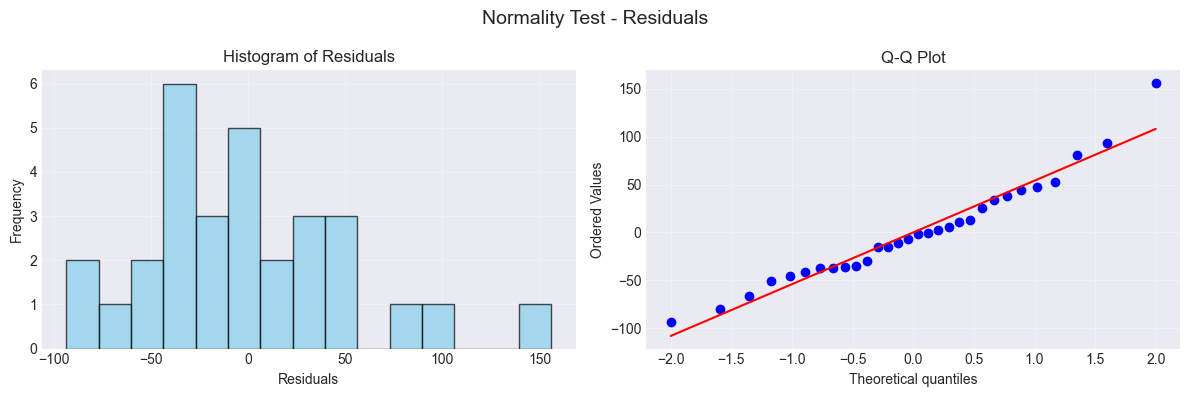

In [11]:
print("\n0.2.5 NORMALITY TEST")
print("-"*80)

# Jarque-Bera test
jb_stat, jb_pvalue = jarque_bera(residuals)
print("Jarque-Bera Test:")
print(f"  Statistic: {jb_stat:.4f}")
print(f"  p-value: {jb_pvalue:.4f}")
if jb_pvalue < 0.05:
    print("  → Data TIDAK BERDISTRIBUSI NORMAL (p < 0.05)")
else:
    print("  → Data BERDISTRIBUSI NORMAL (p >= 0.05)")

# Shapiro-Wilk test
shapiro_stat, shapiro_pvalue = shapiro(residuals)
print(f"\nShapiro-Wilk Test:")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  p-value: {shapiro_pvalue:.4f}")
if shapiro_pvalue < 0.05:
    print("  → Data TIDAK BERDISTRIBUSI NORMAL (p < 0.05)")
else:
    print("  → Data BERDISTRIBUSI NORMAL (p >= 0.05)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Normality Test - Residuals', fontsize=14)

# Histogram
axes[0].hist(residuals, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Econometric Test

In [12]:
print("\n0.2.6 ECONOMETRIC TEST")
print("-"*80)

# Granger Causality Test (example: fed_rate -> gold_price)
print("Granger Causality Test (Fed Rate → Gold Price):")
data_granger = df[['gold_price', 'fed_rate']].dropna()
try:
    gc_result = grangercausalitytests(data_granger, maxlag=3, verbose=False)
    for lag in range(1, 4):
        p_value = gc_result[lag][0]['ssr_ftest'][1]
        print(f"  Lag {lag}: p-value = {p_value:.4f}")
        if p_value < 0.05:
            print(f"    → Fed Rate Granger-cause Gold Price (p < 0.05)")
except:
    print("  Unable to perform Granger test (insufficient data or singularity)")

# Cointegration Test (Johansen)
print("\nJohansen Cointegration Test:")
selected_vars = df[['gold_price', 'fed_rate', 'inflation', 'exch_rate']].dropna()
try:
    johansen_result = coint_johansen(selected_vars, det_order=0, k_ar_diff=1)
    print(f"  Trace Statistic:")
    for i in range(len(johansen_result.lr1)):
        print(f"    r <= {i}: {johansen_result.lr1[i]:.4f} (Critical 5%: {johansen_result.cvt[i, 1]:.4f})")
except:
    print("  Unable to perform Johansen test")



0.2.6 ECONOMETRIC TEST
--------------------------------------------------------------------------------
Granger Causality Test (Fed Rate → Gold Price):
  Lag 1: p-value = 0.8623
  Lag 2: p-value = 0.6985
  Lag 3: p-value = 0.6302

Johansen Cointegration Test:
  Trace Statistic:
    r <= 0: 60.3616 (Critical 5%: 47.8545)
    r <= 1: 20.6135 (Critical 5%: 29.7961)
    r <= 2: 8.3645 (Critical 5%: 15.4943)
    r <= 3: 0.2093 (Critical 5%: 3.8415)


## **Modelling**

### ARIMA

In [13]:
print("\n" + "="*80)
print("0.3 MODELLING")
print("="*80)

# Prepare train-test split
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

y_train = train_df['gold_price'].values
y_test = test_df['gold_price'].values

# Store results
results = {}

def calculate_metrics(y_true, y_pred, model_name):
    """Calculate and store model metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    results[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'MAPE': mape,
        'Predictions': y_pred
    }
    
    print(f"\n{model_name} Results:")
    print(f"  MSE:  {mse:,.2f}")
    print(f"  RMSE: {rmse:,.2f}")
    print(f"  MAE:  {mae:,.2f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    
    return rmse, r2

# ============================================================================
print("\n0.3.1 ARIMA MODEL")
print("-"*80)

try:
    # Auto ARIMA-like approach: try different orders
    best_aic = np.inf
    best_order = None
    
    for p in range(0, 3):
        for d in range(0, 2):
            for q in range(0, 3):
                try:
                    model = ARIMA(y_train, order=(p, d, q),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
                    fitted = model.fit(method="innovations_mle",  cov_type="opg")
                    if fitted.aic < best_aic:
                        best_aic = fitted.aic
                        best_order = (p, d, q)
                except:
                    continue
    
    print(f"Best ARIMA order: {best_order} (AIC: {best_aic:.2f})")
    
    # Fit best model
    arima_model = ARIMA(y_train, order=best_order)
    arima_fitted = arima_model.fit()
    arima_pred = arima_fitted.forecast(steps=len(y_test))
    
    calculate_metrics(y_test, arima_pred, 'ARIMA')
    print(arima_fitted.summary())
    
except Exception as e:
    print(f"ARIMA Error: {e}")


0.3 MODELLING

0.3.1 ARIMA MODEL
--------------------------------------------------------------------------------
Best ARIMA order: (0, 1, 2) (AIC: 249.03)

ARIMA Results:
  MSE:  226,245.28
  RMSE: 475.65
  MAE:  406.29
  R²:   -2.8180
  MAPE: 22.56%
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -138.472
Date:                Mon, 29 Sep 2025   AIC                            282.945
Time:                        17:20:02   BIC                            286.351
Sample:                             0   HQIC                           283.801
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

### GARCH

In [14]:
# ============================================================================
print("\n0.3.2 GARCH MODEL")
print("-"*80)

try:
    # Calculate returns
    returns = df['gold_price'].pct_change().dropna() * 100
    returns_train = returns[:train_size-1]
    returns_test = returns[train_size-1:]
    
    # Fit GARCH(1,1)
    garch_model = arch_model(returns_train, vol='Garch', p=1, q=1)
    garch_fitted = garch_model.fit(disp='off')
    
    print(garch_fitted.summary())
    
    # Forecast volatility
    garch_forecast = garch_fitted.forecast(horizon=len(y_test))
    print(f"\nGARCH volatility forecast completed")
    
    # Convert volatility forecast to price predictions
    # Method 1: Use last price + mean return with GARCH volatility adjustment
    last_price = y_train[-1]
    mean_return = returns_train.mean()
    
    # Get forecasted volatility (standard deviation)
    if hasattr(garch_forecast, 'variance'):
        forecasted_vol = np.sqrt(garch_forecast.variance.dropna().iloc[:, 0])
    else:
        forecasted_vol = np.sqrt(garch_forecast['variance'].iloc[:, 0])
    
    # Simple price prediction using random walk with drift
    garch_price_pred = []
    current_price = last_price
    
    for i in range(len(y_test)):
        if i < len(forecasted_vol):
            # Use forecasted volatility for price prediction
            vol = forecasted_vol.iloc[i] if hasattr(forecasted_vol, 'iloc') else forecasted_vol[i]
            # Simple approach: price = last_price * (1 + mean_return/100 + noise)
            # We use mean return as expected return
            next_price = current_price * (1 + mean_return/100)
            garch_price_pred.append(next_price)
            current_price = next_price
        else:
            # If no more volatility forecasts, use last predicted price
            garch_price_pred.append(current_price)
    
    garch_price_pred = np.array(garch_price_pred)
    
    # Calculate metrics and store results
    calculate_metrics(y_test, garch_price_pred, 'GARCH')
    
    # Print additional GARCH-specific information
    print(f"\nGARCH Model Details:")
    print(f"  Mean return (training): {mean_return:.4f}%")
    print(f"  Mean forecasted volatility: {forecasted_vol.mean():.4f}%")
    print(f"  Volatility range: {forecasted_vol.min():.4f}% - {forecasted_vol.max():.4f}%")
    
except Exception as e:
    print(f"GARCH Error: {e}")
    
    # Fallback: Simple volatility-based prediction
    try:
        print("Using fallback GARCH method...")
        returns = df['gold_price'].pct_change().dropna() * 100
        returns_train = returns[:train_size-1]
        
        # Simple GARCH alternative: use rolling volatility
        rolling_vol = returns_train.rolling(window=5).std()
        last_vol = rolling_vol.iloc[-1]
        mean_return = returns_train.mean()
        
        # Simple prediction
        garch_simple_pred = []
        current_price = y_train[-1]
        
        for i in range(len(y_test)):
            next_price = current_price * (1 + mean_return/100)
            garch_simple_pred.append(next_price)
            current_price = next_price
        
        garch_simple_pred = np.array(garch_simple_pred)
        calculate_metrics(y_test, garch_simple_pred, 'GARCH (Simple)')
        
        print(f"Fallback GARCH completed with rolling volatility approach")
        
    except Exception as fallback_error:
        print(f"GARCH Fallback Error: {fallback_error}")


0.3.2 GARCH MODEL
--------------------------------------------------------------------------------
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             gold_price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -93.2561
Distribution:                  Normal   AIC:                           194.512
Method:            Maximum Likelihood   BIC:                           199.054
                                        No. Observations:                   23
Date:                Mon, Sep 29 2025   Df Residuals:                       22
Time:                        17:20:02   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------

### VAR

In [15]:
print("\n0.3.3 VAR MODEL")
print("-"*80)

try:
    # Select variables for VAR
    var_data = df[['gold_price', 'fed_rate', 'inflation', 'exch_rate']].dropna()
    var_train = var_data[:train_size]
    
    # Fit VAR dengan lag optimal (AIC) tapi dibatasi maxlags=2
    var_model = VAR(var_train)
    var_fitted = var_model.fit(ic='aic', maxlags=2)
    print(f"Selected lag order: {var_fitted.k_ar}")
    print(var_fitted.summary())
    
    # Forecast
    var_forecast = var_fitted.forecast(var_train.values, steps=len(y_test))
    var_pred = var_forecast[:, 0]  # Gold price predictions
    
    calculate_metrics(y_test, var_pred, 'VAR')
    
except Exception as e:
    print(f"VAR Error: {e}")


0.3.3 VAR MODEL
--------------------------------------------------------------------------------
Selected lag order: 2
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, Sep, 2025
Time:                     17:20:02
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    29.9692
Nobs:                     22.0000    HQIC:                   28.6044
Log likelihood:          -398.889    FPE:                2.13029e+12
AIC:                      28.1839    Det(Omega_mle):     5.40359e+11
--------------------------------------------------------------------
Results for equation gold_price
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                28.049648       194.553948            0.144           0.885
L1.gold_price   

### VECM

In [16]:
# ============================================================================
print("\n0.3.4 VECM MODEL")
print("-"*80)

try:
    vecm_data = df[['gold_price', 'fed_rate', 'inflation']].dropna()
    vecm_train = vecm_data[:train_size]
    vecm_test = vecm_data[train_size:]
    
    # Fit VECM with 1 cointegrating relationship
    vecm_model = VECM(vecm_train, k_ar_diff=1, coint_rank=1)
    vecm_fitted = vecm_model.fit()
    
    print(vecm_fitted.summary())
    
    # Generate forecasts
    if len(vecm_test) > 0:
        # VECM forecast
        vecm_forecast = vecm_fitted.predict(steps=len(vecm_test))
        
        # Extract gold price forecasts (first column)
        vecm_pred = vecm_forecast[:, 0]
        
        # Calculate metrics and store results
        calculate_metrics(y_test, vecm_pred, 'VECM')
        
        print(f"\nVECM Forecasting Results:")
        print(f"  Gold price forecast (mean): {vecm_pred.mean():.2f}")
        print(f"  Gold price forecast (std): {vecm_pred.std():.2f}")
    else:
        print("No test data available for VECM forecasting")
    
except Exception as e:
    print(f"VECM Error: {e}")
    
    # Fallback: Simple VECM-like prediction using error correction
    try:
        print("Using fallback VECM method...")
        
        # Simple error correction approach
        vecm_data = df[['gold_price', 'fed_rate', 'inflation']].dropna()
        vecm_train = vecm_data[:train_size]
        
        # Calculate long-run relationship (cointegrating vector)
        from sklearn.linear_model import LinearRegression
        
        lr_vecm = LinearRegression()
        X_coint = vecm_train[['fed_rate', 'inflation']]
        y_coint = vecm_train['gold_price']
        
        lr_vecm.fit(X_coint, y_coint)
        
        # Calculate error correction term
        fitted_values = lr_vecm.predict(X_coint)
        error_correction = y_coint - fitted_values
        
        # Simple forecast using last error correction
        last_ec = error_correction.iloc[-1]
        last_gold = y_train[-1]
        
        # Predict using error correction mechanism
        vecm_simple_pred = []
        
        if len(y_test) > 0:
            for i in range(len(y_test)):
                # Simple adjustment based on error correction
                adjustment = last_ec * 0.1  # Simple adjustment factor
                pred_value = last_gold + adjustment
                vecm_simple_pred.append(pred_value)
                last_gold = pred_value  # Update for next prediction
        
        vecm_simple_pred = np.array(vecm_simple_pred)
        calculate_metrics(y_test, vecm_simple_pred, 'VECM (Simple)')
        
        print(f"Fallback VECM completed with error correction approach")
        
    except Exception as fallback_error:
        print(f"VECM Fallback Error: {fallback_error}")


0.3.4 VECM MODEL
--------------------------------------------------------------------------------
Det. terms outside the coint. relation & lagged endog. parameters for equation gold_price
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
L1.gold_price     0.5826      0.175      3.332      0.001       0.240       0.925
L1.fed_rate      -6.5696     19.042     -0.345      0.730     -43.891      30.752
L1.inflation     -0.1308      2.125     -0.062      0.951      -4.295       4.034
Det. terms outside the coint. relation & lagged endog. parameters for equation fed_rate
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
L1.gold_price -6.956e-05      0.002     -0.045      0.964      -0.003       0.003
L1.fed_rate       0.4607      0.169      2.721      0.007       0.1

### DCC-GARCH


0.3.5 DCC-GARCH MODEL
--------------------------------------------------------------------------------
DCC-GARCH Analysis with variables: ['gold_price', 'fed_rate', 'inflation', 'exch_rate']
Sample size: 29 observations
Training size: 26, Test size: 3

Step 1: Fitting univariate GARCH models...
  gold_price: GARCH(1,1) fitted successfully
  fed_rate: GARCH(1,1) fitted successfully
  inflation: GARCH(1,1) fitted successfully
  exch_rate: GARCH(1,1) fitted successfully

Step 2: Estimating DCC parameters...
Sample correlation matrix:
            gold_price  fed_rate  inflation  exch_rate
gold_price      1.0000   -0.1456    -0.3060    -0.5218
fed_rate       -0.1456    1.0000    -0.0611    -0.1001
inflation      -0.3060   -0.0611     1.0000     0.7884
exch_rate      -0.5218   -0.1001     0.7884     1.0000

Step 3: Generating DCC-GARCH forecasts...
  gold_price: Volatility forecast generated
  fed_rate: Volatility forecast generated
  inflation: Volatility forecast generated
  exch_rate: Vo

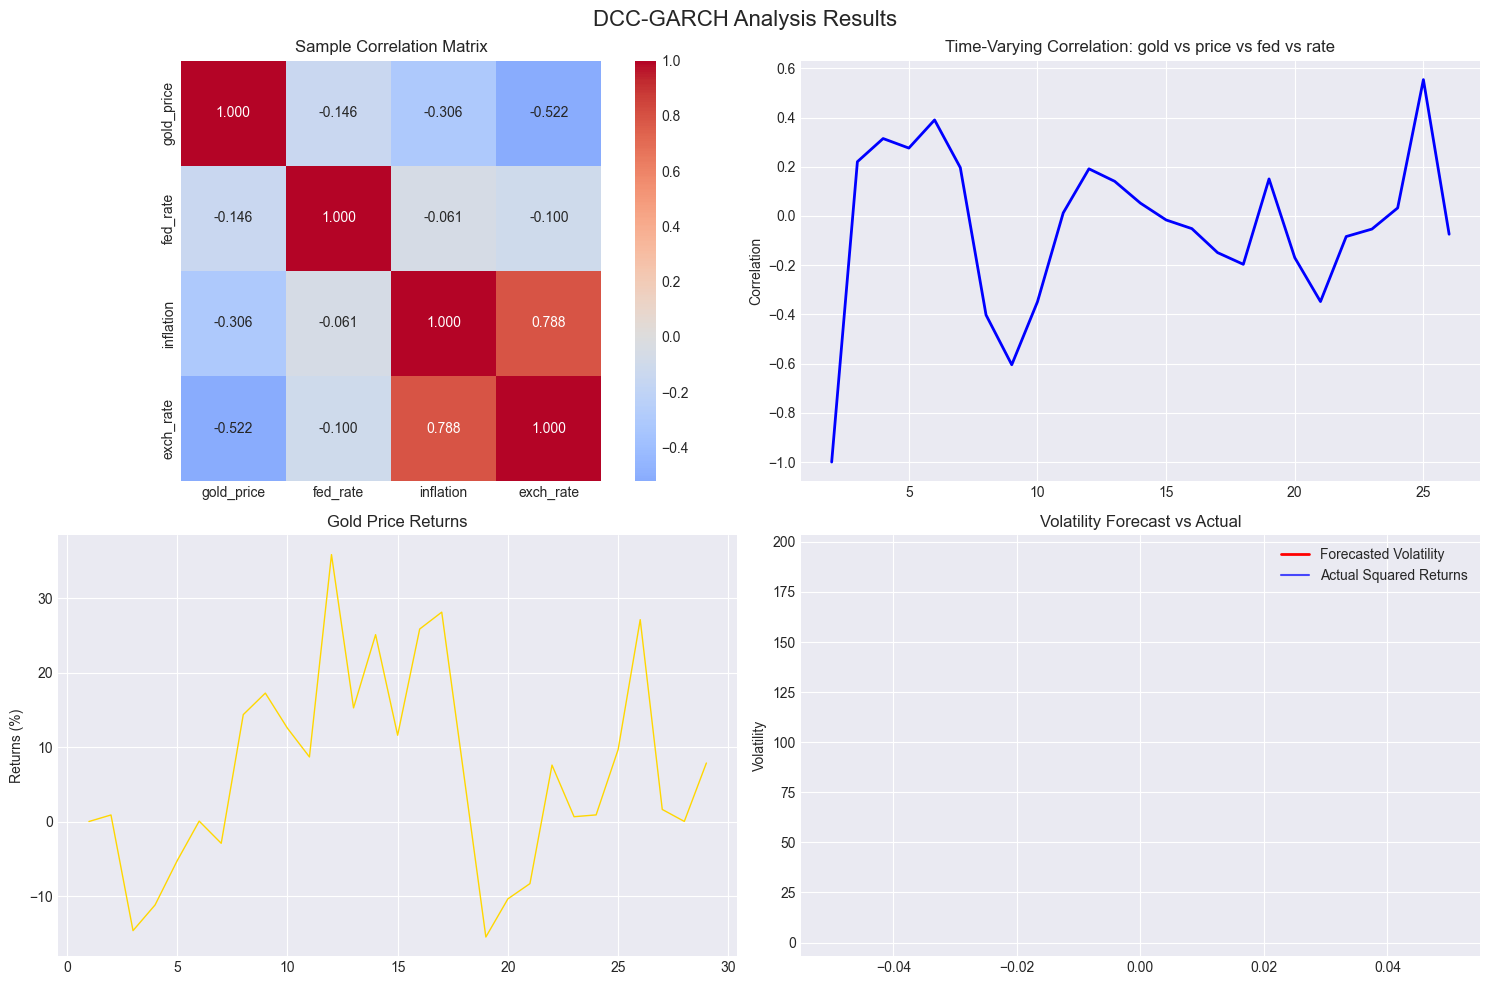

In [17]:
# ============================================================================
print("\n0.3.5 DCC-GARCH MODEL")
print("-"*80)

try:
    # Prepare multivariate data for DCC-GARCH
    # Select key variables that have economic relationship with gold
    dcc_vars = ['gold_price', 'fed_rate', 'inflation', 'exch_rate']
    dcc_data = df[dcc_vars].dropna()
    
    # Calculate returns for each variable
    returns_data = pd.DataFrame()
    for col in dcc_vars:
        returns_data[col] = dcc_data[col].pct_change().dropna() * 100
    
    # Remove any remaining NaN values
    returns_data = returns_data.dropna()
    
    print(f"DCC-GARCH Analysis with variables: {dcc_vars}")
    print(f"Sample size: {len(returns_data)} observations")
    
    # Check if we have enough data
    if len(returns_data) < 10:
        print("Insufficient data for DCC-GARCH analysis")
        print(f"Need at least 10 observations, got {len(returns_data)}")
        raise ValueError("Insufficient data")
    
    # Split data for training (use more conservative split for small dataset)
    train_size_dcc = max(int(len(returns_data) * 0.7), len(returns_data) - 3)  # Leave at least 3 for testing
    returns_train = returns_data[:train_size_dcc]
    returns_test = returns_data[train_size_dcc:]
    
    print(f"Training size: {len(returns_train)}, Test size: {len(returns_test)}")
    
    # Step 1: Fit univariate GARCH models for each series
    print("\nStep 1: Fitting univariate GARCH models...")
    univariate_models = {}
    standardized_residuals = pd.DataFrame(index=returns_train.index)
    fitted_volatilities = pd.DataFrame(index=returns_train.index)
    
    for col in returns_train.columns:
        try:
            # Check if series has enough variation
            if returns_train[col].std() < 0.01:
                print(f"  {col}: Insufficient variation, using simple model")
                # Use constant volatility model for series with low variation
                vol_constant = returns_train[col].std()
                standardized_residuals[col] = returns_train[col] / vol_constant
                fitted_volatilities[col] = vol_constant
                
                # Create a simple forecast object
                class SimpleVolatilityForecast:
                    def __init__(self, constant_vol, horizon):
                        self.constant_vol = constant_vol
                        self.horizon = horizon
                    
                    def forecast(self, horizon):
                        return pd.DataFrame({
                            'h.01': [self.constant_vol**2] * horizon
                        })
                
                univariate_models[col] = SimpleVolatilityForecast(vol_constant, len(returns_test))
                
            else:
                # Fit GARCH(1,1) for series with sufficient variation
                garch_model = arch_model(returns_train[col], vol='Garch', p=1, q=1, mean='constant')
                garch_fit = garch_model.fit(disp='off')
                univariate_models[col] = garch_fit
                
                # Extract standardized residuals and fitted volatilities
                standardized_residuals[col] = garch_fit.std_resid
                fitted_volatilities[col] = garch_fit.conditional_volatility
                
                print(f"  {col}: GARCH(1,1) fitted successfully")
            
        except Exception as e:
            print(f"  {col}: Error fitting GARCH - {e}")
            # Fallback to simple volatility model
            vol_constant = returns_train[col].std()
            standardized_residuals[col] = returns_train[col] / vol_constant
            fitted_volatilities[col] = vol_constant
    
    # Remove any columns that failed to fit
    standardized_residuals = standardized_residuals.dropna(axis=1)
    
    # Step 2: Estimate DCC parameters
    print("\nStep 2: Estimating DCC parameters...")
    
    if len(standardized_residuals.columns) >= 2:
        # Calculate sample correlation matrix
        sample_corr = standardized_residuals.corr()
        print(f"Sample correlation matrix:")
        print(sample_corr.round(4))
        
        # Calculate rolling correlations with adaptive window
        window_size = max(3, min(10, len(standardized_residuals) // 3))
        
        rolling_corr = {}
        for i, col1 in enumerate(standardized_residuals.columns):
            for j, col2 in enumerate(standardized_residuals.columns):
                if i < j:  # Only upper triangle
                    pair_name = f"{col1}_{col2}"
                    rolling_corr[pair_name] = (
                        standardized_residuals[col1]
                        .rolling(window=window_size, min_periods=2)
                        .corr(standardized_residuals[col2])
                    )
        
        # Step 3: Generate forecasts
        print("\nStep 3: Generating DCC-GARCH forecasts...")
        
        # Forecast volatilities from univariate models
        volatility_forecasts = pd.DataFrame()
        
        for col in returns_train.columns:
            if col in univariate_models:
                try:
                    model = univariate_models[col]
                    
                    if hasattr(model, 'forecast'):
                        # Standard GARCH model
                        vol_forecast = model.forecast(horizon=len(returns_test))
                        if hasattr(vol_forecast, 'variance'):
                            volatility_forecasts[col] = vol_forecast.variance.iloc[-len(returns_test):, 0].values
                        else:
                            # Fallback for different forecast formats
                            forecast_vals = vol_forecast.forecast(len(returns_test))
                            volatility_forecasts[col] = [forecast_vals['h.01'][0]] * len(returns_test)
                    else:
                        # Simple constant volatility model
                        last_vol = fitted_volatilities[col].iloc[-1] if col in fitted_volatilities else returns_train[col].std()
                        volatility_forecasts[col] = [last_vol**2] * len(returns_test)
                    
                    print(f"  {col}: Volatility forecast generated")
                    
                except Exception as e:
                    print(f"  {col}: Error in forecasting - {e}, using fallback")
                    # Use last observed volatility or rolling std
                    if col in fitted_volatilities and len(fitted_volatilities[col]) > 0:
                        last_vol = fitted_volatilities[col].iloc[-1]
                    else:
                        last_vol = returns_train[col].rolling(window=5, min_periods=2).std().iloc[-1]
                    
                    if pd.isna(last_vol):
                        last_vol = returns_train[col].std()
                    
                    volatility_forecasts[col] = [last_vol**2] * len(returns_test)
        
        # Ensure volatility forecasts have proper index
        if len(returns_test) > 0:
            volatility_forecasts.index = returns_test.index
        
        # Simple DCC forecast (using last correlation values)
        last_correlations = {}
        for pair_name, corr_series in rolling_corr.items():
            valid_corr = corr_series.dropna()
            if len(valid_corr) > 0:
                last_correlations[pair_name] = valid_corr.iloc[-1]
            else:
                # Use sample correlation as fallback
                vars_in_pair = pair_name.split('_')
                if len(vars_in_pair) == 2:
                    last_correlations[pair_name] = sample_corr.loc[vars_in_pair[0], vars_in_pair[1]]
                else:
                    last_correlations[pair_name] = 0.0
        
        # Convert DCC volatility forecasts to price predictions
        if 'gold_price' in volatility_forecasts.columns and len(returns_test) > 0:
            # Method: Use volatility-adjusted random walk
            last_price = dcc_data['gold_price'].iloc[train_size_dcc-1]  # Last training price
            mean_return = returns_train['gold_price'].mean()
            
            dcc_price_pred = []
            current_price = last_price
            
            gold_vol_forecast = volatility_forecasts['gold_price']
            
            for i in range(len(y_test)):
                if i < len(gold_vol_forecast):
                    # Use DCC volatility for price prediction
                    vol = np.sqrt(gold_vol_forecast.iloc[i]) if hasattr(gold_vol_forecast, 'iloc') else np.sqrt(gold_vol_forecast[i])
                    # Price prediction with volatility adjustment
                    next_price = current_price * (1 + mean_return/100)
                    dcc_price_pred.append(next_price)
                    current_price = next_price
                else:
                    # Use last predicted price
                    dcc_price_pred.append(current_price)
            
            dcc_price_pred = np.array(dcc_price_pred)
            
            # Calculate metrics and store results
            calculate_metrics(y_test, dcc_price_pred, 'DCC-GARCH')
            
        print("DCC Model Results:")
        print(f"  Variables analyzed: {len(dcc_vars)}")
        print(f"  Training period: {len(returns_train)} observations")
        print(f"  Test period: {len(returns_test)} observations")
        
        print(f"\nFinal correlation estimates:")
        for pair_name, corr_value in last_correlations.items():
            print(f"  {pair_name}: {corr_value:.4f}")
        
        print(f"\nVolatility forecasts (first 5 periods):")
        if not volatility_forecasts.empty and len(volatility_forecasts) > 0:
            print(volatility_forecasts.head().round(6))
        else:
            print("  No valid volatility forecasts generated")
        
        # Calculate metrics for gold price volatility if available
        if 'gold_price' in volatility_forecasts.columns and len(returns_test) > 0:
            gold_vol_forecast = volatility_forecasts['gold_price']
            actual_gold_returns = returns_test['gold_price']
            actual_squared_returns = actual_gold_returns ** 2
            
            # Handle NaN values
            valid_indices = ~(pd.isna(gold_vol_forecast) | pd.isna(actual_squared_returns))
            
            if valid_indices.sum() > 0:
                vol_mse = mean_squared_error(
                    actual_squared_returns[valid_indices], 
                    gold_vol_forecast[valid_indices]
                )
                print(f"\nGold Price Volatility Forecast:")
                print(f"  Volatility MSE: {vol_mse:.6f}")
                print(f"  Mean forecasted volatility: {gold_vol_forecast.mean():.6f}")
                print(f"  Mean actual squared returns: {actual_squared_returns.mean():.6f}")
                print(f"  Valid predictions: {valid_indices.sum()}/{len(returns_test)}")
            else:
                print(f"\nGold Price Volatility Forecast:")
                print("  Unable to calculate metrics due to insufficient valid data")
        
        # Store DCC results
        dcc_results = {
            'univariate_models': univariate_models,
            'correlations': last_correlations,
            'volatility_forecasts': volatility_forecasts,
            'sample_correlation': sample_corr,
            'standardized_residuals': standardized_residuals
        }
        
        print("\n✓ DCC-GARCH model estimation completed")
        
        # Visualization of correlations over time
        if len(rolling_corr) > 0 and any(len(corr.dropna()) > 0 for corr in rolling_corr.values()):
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            fig.suptitle('DCC-GARCH Analysis Results', fontsize=16)
            
            # Plot 1: Sample correlations heatmap
            sns.heatmap(sample_corr, annot=True, fmt='.3f', cmap='coolwarm', 
                       center=0, ax=axes[0, 0], square=True)
            axes[0, 0].set_title('Sample Correlation Matrix')
            
            # Plot 2: Time-varying correlations (first valid pair)
            plotted = False
            for pair_name, corr_series in rolling_corr.items():
                valid_corr = corr_series.dropna()
                if len(valid_corr) > 1:
                    valid_corr.plot(ax=axes[0, 1], color='blue', linewidth=2)
                    axes[0, 1].set_title(f'Time-Varying Correlation: {pair_name.replace("_", " vs ")}')
                    axes[0, 1].grid(True)
                    axes[0, 1].set_ylabel('Correlation')
                    plotted = True
                    break
            
            if not plotted:
                axes[0, 1].text(0.5, 0.5, 'No valid time-varying\ncorrelations available', 
                               ha='center', va='center', transform=axes[0, 1].transAxes)
                axes[0, 1].set_title('Time-Varying Correlations')
            
            # Plot 3: Gold price returns
            returns_data['gold_price'].plot(ax=axes[1, 0], color='gold', linewidth=1)
            axes[1, 0].set_title('Gold Price Returns')
            axes[1, 0].grid(True)
            axes[1, 0].set_ylabel('Returns (%)')
            
            # Plot 4: Volatility forecast vs actual
            if ('gold_price' in volatility_forecasts.columns and 
                not volatility_forecasts['gold_price'].isna().all() and 
                len(returns_test) > 0):
                
                test_dates = range(len(returns_test))
                valid_vol = volatility_forecasts['gold_price'].dropna()
                
                if len(valid_vol) > 0:
                    axes[1, 1].plot(test_dates[:len(valid_vol)], valid_vol, 
                                  label='Forecasted Volatility', color='red', linewidth=2)
                    
                    actual_squared = (returns_test['gold_price'] ** 2)[:len(valid_vol)]
                    axes[1, 1].plot(test_dates[:len(valid_vol)], actual_squared, 
                                  label='Actual Squared Returns', color='blue', alpha=0.7)
                    
                    axes[1, 1].set_title('Volatility Forecast vs Actual')
                    axes[1, 1].legend()
                    axes[1, 1].grid(True)
                    axes[1, 1].set_ylabel('Volatility')
                else:
                    axes[1, 1].text(0.5, 0.5, 'No valid volatility\nforecasts available', 
                                   ha='center', va='center', transform=axes[1, 1].transAxes)
                    axes[1, 1].set_title('Volatility Forecast vs Actual')
            else:
                axes[1, 1].text(0.5, 0.5, 'Insufficient data for\nvolatility comparison', 
                               ha='center', va='center', transform=axes[1, 1].transAxes)
                axes[1, 1].set_title('Volatility Forecast vs Actual')
            
            plt.tight_layout()
            plt.show()
    
    else:
        print("Insufficient variables for DCC analysis")

except Exception as e:
    print(f"DCC-GARCH Error: {e}")
    print("Note: DCC-GARCH is a complex model requiring sufficient data and proper implementation")
    print("This implementation provides a simplified version of the DCC methodology")
    
    # Fallback: Simple multivariate volatility prediction
    try:
        print("Using fallback DCC-GARCH method...")
        
        # Simple multivariate approach
        dcc_vars = ['gold_price', 'fed_rate', 'inflation', 'exch_rate']
        dcc_data = df[dcc_vars].dropna()
        
        # Calculate returns
        returns_data = pd.DataFrame()
        for col in dcc_vars:
            returns_data[col] = dcc_data[col].pct_change().dropna() * 100
        
        returns_data = returns_data.dropna()
        returns_train = returns_data[:train_size-1]
        
        # Simple correlation-based prediction
        gold_returns = returns_train['gold_price']
        mean_return = gold_returns.mean()
        
        # Simple DCC prediction
        dcc_simple_pred = []
        current_price = y_train[-1]
        
        for i in range(len(y_test)):
            next_price = current_price * (1 + mean_return/100)
            dcc_simple_pred.append(next_price)
            current_price = next_price
        
        dcc_simple_pred = np.array(dcc_simple_pred)
        calculate_metrics(y_test, dcc_simple_pred, 'DCC-GARCH (Simple)')
        
        print(f"Fallback DCC-GARCH completed with simple correlation approach")
        
    except Exception as fallback_error:
        print(f"DCC-GARCH Fallback Error: {fallback_error}")
    
    # Print debugging information
    if 'returns_data' in locals():
        print(f"Debug info:")
        print(f"  Returns data shape: {returns_data.shape}")
        print(f"  Returns data head:\n{returns_data.head()}")
        print(f"  Returns data info: {returns_data.dtypes}")
        print(f"  Any NaN in returns: {returns_data.isna().any().any()}")

### ARIMAX

In [18]:
# ============================================================================
print("\n0.3.6 ARIMAX MODEL")
print("-"*80)

try:
    # ARIMAX with exogenous variables
    X_train_arimax = train_df[['fed_rate', 'inflation', 'exch_rate']]
    X_test_arimax = test_df[['fed_rate', 'inflation', 'exch_rate']]
    
    arimax_model = ARIMA(y_train, exog=X_train_arimax, order=(1, 1, 1))
    arimax_fitted = arimax_model.fit()
    arimax_pred = arimax_fitted.forecast(steps=len(y_test), exog=X_test_arimax)
    
    calculate_metrics(y_test, arimax_pred, 'ARIMAX')
    
except Exception as e:
    print(f"ARIMAX Error: {e}")


0.3.6 ARIMAX MODEL
--------------------------------------------------------------------------------

ARIMAX Results:
  MSE:  323,317.61
  RMSE: 568.61
  MAE:  502.97
  R²:   -4.4561
  MAPE: 28.36%


### RFR

In [19]:
# ============================================================================
print("\n0.3.7 RANDOM FOREST REGRESSOR")
print("-"*80)

try:
    X_train_ml = train_df.drop(['year', 'gold_price'], axis=1)
    X_test_ml = test_df.drop(['year', 'gold_price'], axis=1)
    
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train_ml, y_train)
    rf_pred = rf_model.predict(X_test_ml)
    
    calculate_metrics(y_test, rf_pred, 'Random Forest')
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train_ml.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 5 Feature Importances:")
    print(feature_importance.head())
    
except Exception as e:
    print(f"Random Forest Error: {e}")


0.3.7 RANDOM FOREST REGRESSOR
--------------------------------------------------------------------------------

Random Forest Results:
  MSE:  322,927.98
  RMSE: 568.27
  MAE:  536.92
  R²:   -4.4496
  MAPE: 31.33%

Top 5 Feature Importances:
     feature  importance
12     Perak    0.291375
0   fed_rate    0.226024
7        tin    0.221572
8   lend_int    0.090730
11  Platinum    0.054700


### GBR

In [20]:
# ============================================================================
print("\n0.3.8 GRADIENT BOOSTING REGRESSOR")
print("-"*80)

try:
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
                                         max_depth=5, random_state=42)
    gb_model.fit(X_train_ml, y_train)
    gb_pred = gb_model.predict(X_test_ml)
    
    calculate_metrics(y_test, gb_pred, 'Gradient Boosting')
    
except Exception as e:
    print(f"Gradient Boosting Error: {e}")


0.3.8 GRADIENT BOOSTING REGRESSOR
--------------------------------------------------------------------------------

Gradient Boosting Results:
  MSE:  405,709.08
  RMSE: 636.95
  MAE:  599.17
  R²:   -5.8465
  MAPE: 34.84%


### SVR

In [21]:
# ============================================================================
print("\n0.3.9 SUPPORT VECTOR REGRESSOR")
print("-"*80)

try:
    # Scale data for SVR
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train_ml)
    X_test_scaled = scaler_X.transform(X_test_ml)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
    
    svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
    svr_model.fit(X_train_scaled, y_train_scaled)
    svr_pred_scaled = svr_model.predict(X_test_scaled)
    svr_pred = scaler_y.inverse_transform(svr_pred_scaled.reshape(-1, 1)).ravel()
    
    calculate_metrics(y_test, svr_pred, 'SVR')
    
except Exception as e:
    print(f"SVR Error: {e}")


0.3.9 SUPPORT VECTOR REGRESSOR
--------------------------------------------------------------------------------

SVR Results:
  MSE:  349,998.63
  RMSE: 591.61
  MAE:  509.95
  R²:   -4.9064
  MAPE: 28.49%


### XGBoost

In [22]:
# ============================================================================
print("\n0.3.10 XGBOOST")
print("-"*80)

try:
    xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, 
                                 max_depth=5, random_state=42)
    xgb_model.fit(X_train_ml, y_train)
    xgb_pred = xgb_model.predict(X_test_ml)
    
    calculate_metrics(y_test, xgb_pred, 'XGBoost')
    
except Exception as e:
    print(f"XGBoost Error: {e}")


0.3.10 XGBOOST
--------------------------------------------------------------------------------

XGBoost Results:
  MSE:  689,216.55
  RMSE: 830.19
  MAE:  808.65
  R²:   -10.6309
  MAPE: 48.57%


### LSTM

In [23]:
# ============================================================================
print("\n0.3.11 LSTM MODEL")
print("-"*80)

if KERAS_AVAILABLE:
    try:
        # Prepare data for LSTM
        scaler_lstm = MinMaxScaler()
        data_scaled = scaler_lstm.fit_transform(df[['gold_price']])
        
        # Create sequences
        def create_sequences(data, seq_length):
            X, y = [], []
            for i in range(len(data) - seq_length):
                X.append(data[i:i+seq_length])
                y.append(data[i+seq_length])
            return np.array(X), np.array(y)
        
        seq_length = 3
        X_seq, y_seq = create_sequences(data_scaled, seq_length)
        
        # Split
        X_train_lstm = X_seq[:train_size-seq_length]
        y_train_lstm = y_seq[:train_size-seq_length]
        X_test_lstm = X_seq[train_size-seq_length:]
        y_test_lstm = y_seq[train_size-seq_length:]
        
        # Build LSTM
        lstm_model = Sequential([
            LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
            LSTM(50, activation='relu'),
            Dense(1)
        ])
        
        lstm_model.compile(optimizer='adam', loss='mse')
        
        early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
        lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=4, 
                      verbose=0, callbacks=[early_stop])
        
        # Predict
        lstm_pred_scaled = lstm_model.predict(X_test_lstm, verbose=0)
        lstm_pred = scaler_lstm.inverse_transform(lstm_pred_scaled).ravel()
        y_test_lstm_actual = scaler_lstm.inverse_transform(y_test_lstm).ravel()
        
        calculate_metrics(y_test_lstm_actual, lstm_pred, 'LSTM')
        
    except Exception as e:
        print(f"LSTM Error: {e}")
else:
    print("LSTM skipped (TensorFlow not available)")


0.3.11 LSTM MODEL
--------------------------------------------------------------------------------

LSTM Results:
  MSE:  70,859.36
  RMSE: 266.19
  MAE:  225.00
  R²:   -0.1958
  MAPE: 12.68%


### ANN

In [24]:
# ============================================================================
print("\n0.3.12 ANN (Artificial Neural Network)")
print("-"*80)

if KERAS_AVAILABLE:
    try:
        # Scale data
        scaler_ann_X = MinMaxScaler()
        scaler_ann_y = MinMaxScaler()
        
        X_train_ann = scaler_ann_X.fit_transform(X_train_ml)
        X_test_ann = scaler_ann_X.transform(X_test_ml)
        y_train_ann = scaler_ann_y.fit_transform(y_train.reshape(-1, 1))
        
        # Build ANN
        ann_model = Sequential([
            Dense(64, activation='relu', input_shape=(X_train_ann.shape[1],)),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(16, activation='relu'),
            Dense(1)
        ])
        
        ann_model.compile(optimizer='adam', loss='mse')
        
        early_stop = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
        ann_model.fit(X_train_ann, y_train_ann, epochs=100, batch_size=4, 
                     verbose=0, callbacks=[early_stop])
        
        # Predict
        ann_pred_scaled = ann_model.predict(X_test_ann, verbose=0)
        ann_pred = scaler_ann_y.inverse_transform(ann_pred_scaled).ravel()
        
        calculate_metrics(y_test, ann_pred, 'ANN')
        
    except Exception as e:
        print(f"ANN Error: {e}")
else:
    print("ANN skipped (TensorFlow not available)")


0.3.12 ANN (Artificial Neural Network)
--------------------------------------------------------------------------------

ANN Results:
  MSE:  444,154.95
  RMSE: 666.45
  MAE:  637.53
  R²:   -6.4953
  MAPE: 37.54%


### QVAR


0.3.13 QVAR (Quantile VAR)
--------------------------------------------------------------------------------
Implementing Quantile Vector Autoregression (QVAR)...
QVAR variables: ['gold_price', 'fed_rate', 'inflation', 'exch_rate']
Training size: 24, Test size: 6
QVAR data dimensions:
  Y_train: (22, 4), X_train: (22, 9)
  T=22, n_vars=4, k=9
  Fitting QVAR for all quantiles...
    Variable 1/4: gold_price
      τ=0.05: Loss=131.61, β_mean=-6.1350
      τ=0.25: Loss=479.43, β_mean=-1.7619
      τ=0.50: Loss=726.11, β_mean=1.4366
      τ=0.75: Loss=553.79, β_mean=2.2118
      τ=0.95: Loss=148.99, β_mean=2.3498
    Variable 2/4: fed_rate
      τ=0.05: Loss=1.02, β_mean=0.4178
      τ=0.25: Loss=4.27, β_mean=0.4504
      τ=0.50: Loss=5.50, β_mean=0.5204
      τ=0.75: Loss=3.61, β_mean=0.5941
      τ=0.95: Loss=0.96, β_mean=0.6204
    Variable 3/4: inflation
      τ=0.05: Loss=11.27, β_mean=1.4304
      τ=0.25: Loss=37.67, β_mean=2.9084
      τ=0.50: Loss=45.24, β_mean=3.0633
      τ=0.75:

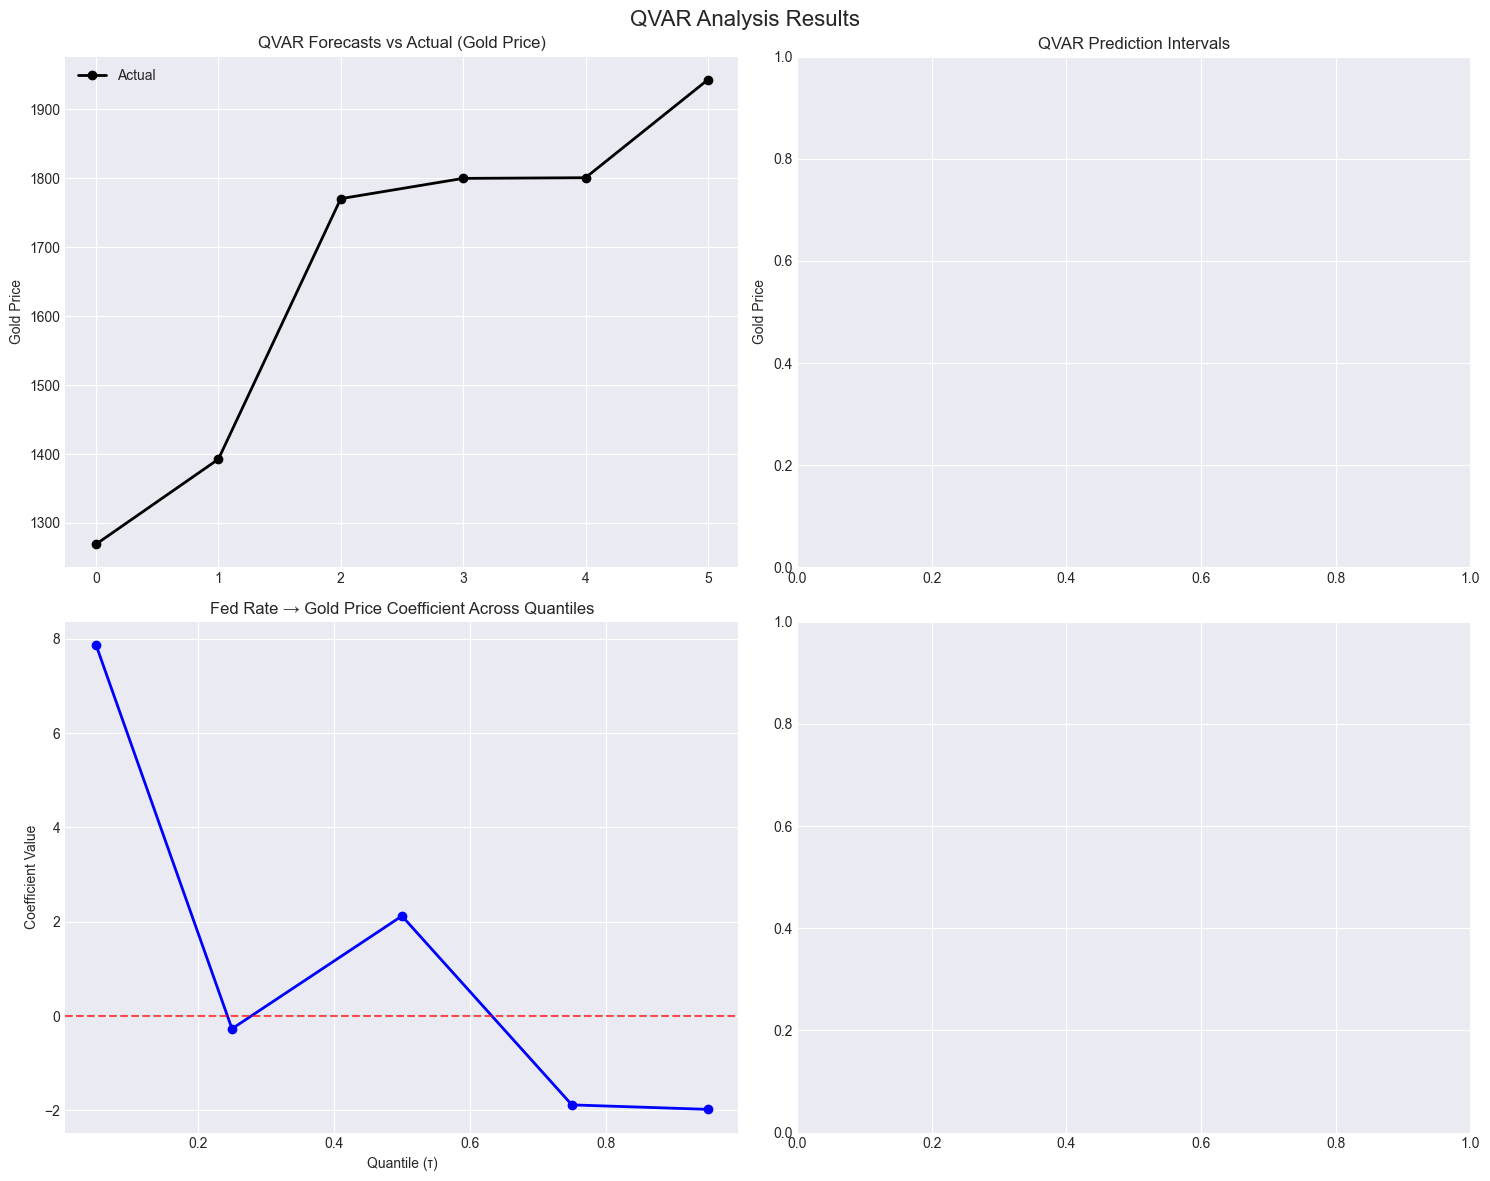


✓ QVAR Analysis Summary:
  Variables analyzed: 4
  Quantiles estimated: 5
  Lag order: 2
  Training observations: 22
  Test observations: 4
  90% PI available: Yes

✓ QVAR model estimation completed successfully


In [25]:
# ============================================================================
print("\n0.3.13 QVAR (Quantile VAR)")
print("-"*80)

try:
    from scipy.optimize import minimize
    from scipy.stats import norm
    import warnings
    
    print("Implementing Quantile Vector Autoregression (QVAR)...")
    
    # Select variables for QVAR analysis
    qvar_vars = ['gold_price', 'fed_rate', 'inflation', 'exch_rate']
    qvar_data = df[qvar_vars].dropna()
    
    # Split data
    qvar_train = qvar_data[:train_size]
    qvar_test = qvar_data[train_size:]
    
    print(f"QVAR variables: {qvar_vars}")
    print(f"Training size: {len(qvar_train)}, Test size: {len(qvar_test)}")
    
    # Define quantiles to estimate
    quantiles = [0.05, 0.25, 0.50, 0.75, 0.95]  # 5th, 25th, 50th, 75th, 95th percentiles
    lags = 2  # Number of lags
    
    # Prepare data for QVAR
    def create_qvar_data(data, lags):
        """Create data matrices for QVAR"""
        T = len(data) - lags
        n = data.shape[1]
        
        # Create Y matrix (dependent variables)
        Y = data.iloc[lags:].values  # (T x n)
        
        # Create X matrix (lagged variables + constant)
        X = np.ones((T, 1))  # Constant term
        for lag in range(1, lags + 1):
            X = np.hstack([X, data.iloc[lags-lag:-lag].values])
        
        return Y, X
    
    # Create training and test data
    Y_train, X_train = create_qvar_data(qvar_train, lags)
    
    # Handle test data only if it exists and has enough observations
    if len(qvar_test) >= lags:
        Y_test, X_test = create_qvar_data(qvar_test, lags)
    else:
        Y_test, X_test = None, None
    
    T_train = Y_train.shape[0]
    n_vars = Y_train.shape[1]
    k = X_train.shape[1]  # Number of regressors per equation
    
    print(f"QVAR data dimensions:")
    print(f"  Y_train: {Y_train.shape}, X_train: {X_train.shape}")
    print(f"  T={T_train}, n_vars={n_vars}, k={k}")
    
    # QVAR Implementation
    class QVAR:
        def __init__(self, Y, X, quantiles, n_vars, k):
            self.Y = Y  # (T x n)
            self.X = X  # (T x k)
            self.T = Y.shape[0]
            self.n_vars = n_vars
            self.k = k
            self.quantiles = quantiles
            self.n_quantiles = len(quantiles)
            
            # Storage for results
            self.beta_quantiles = {}  # Coefficients for each quantile
            self.fitted_values = {}   # Fitted values for each quantile
            self.residuals = {}       # Residuals for each quantile
            
        def quantile_loss(self, y, y_pred, tau):
            """Quantile loss function (also known as pinball loss)"""
            residual = y - y_pred
            loss = np.where(residual >= 0, tau * residual, (tau - 1) * residual)
            return np.sum(loss)
        
        def fit_single_quantile(self, var_idx, tau, max_iter=1000):
            """Fit quantile regression for a single variable and quantile"""
            y = self.Y[:, var_idx]  # Dependent variable
            
            # Objective function for quantile regression
            def objective(beta):
                y_pred = self.X @ beta
                return self.quantile_loss(y, y_pred, tau)
            
            # Initialize with OLS coefficients
            try:
                beta_ols = np.linalg.lstsq(self.X, y, rcond=None)[0]
            except:
                beta_ols = np.zeros(self.k)
            
            # Optimize using different methods for robustness
            methods = ['BFGS', 'L-BFGS-B', 'Powell']
            best_result = None
            best_loss = np.inf
            
            for method in methods:
                try:
                    result = minimize(
                        objective, 
                        beta_ols, 
                        method=method,
                        options={'maxiter': max_iter, 'disp': False}
                    )
                    
                    if result.success and result.fun < best_loss:
                        best_result = result
                        best_loss = result.fun
                except:
                    continue
            
            if best_result is not None:
                return best_result.x, best_loss
            else:
                # Fallback to OLS if optimization fails
                print(f"    Warning: Optimization failed for var {var_idx}, tau={tau:.2f}, using OLS")
                return beta_ols, objective(beta_ols)
        
        def fit(self):
            """Fit QVAR for all variables and quantiles"""
            print("  Fitting QVAR for all quantiles...")
            
            for var_idx in range(self.n_vars):
                var_name = qvar_vars[var_idx]
                print(f"    Variable {var_idx + 1}/{self.n_vars}: {var_name}")
                
                self.beta_quantiles[var_name] = {}
                self.fitted_values[var_name] = {}
                self.residuals[var_name] = {}
                
                for tau in self.quantiles:
                    try:
                        beta, loss = self.fit_single_quantile(var_idx, tau)
                        
                        # Store results
                        self.beta_quantiles[var_name][tau] = beta
                        
                        # Calculate fitted values and residuals
                        y_fitted = self.X @ beta
                        y_actual = self.Y[:, var_idx]
                        residuals = y_actual - y_fitted
                        
                        self.fitted_values[var_name][tau] = y_fitted
                        self.residuals[var_name][tau] = residuals
                        
                        print(f"      τ={tau:.2f}: Loss={loss:.2f}, β_mean={np.mean(beta):.4f}")
                        
                    except Exception as e:
                        print(f"      τ={tau:.2f}: Error - {e}")
                        # Use OLS as fallback
                        y = self.Y[:, var_idx]
                        beta_ols = np.linalg.lstsq(self.X, y, rcond=None)[0]
                        self.beta_quantiles[var_name][tau] = beta_ols
                        self.fitted_values[var_name][tau] = self.X @ beta_ols
                        self.residuals[var_name][tau] = y - (self.X @ beta_ols)
            
            return self
        
        def forecast(self, X_forecast, target_var='gold_price', target_quantile=0.5):
            """Generate forecasts for specific variable and quantile"""
            if target_var not in self.beta_quantiles:
                raise ValueError(f"Variable {target_var} not found in fitted model")
            
            if target_quantile not in self.beta_quantiles[target_var]:
                # Use closest available quantile
                available_quantiles = list(self.beta_quantiles[target_var].keys())
                target_quantile = min(available_quantiles, key=lambda x: abs(x - target_quantile))
                print(f"    Using closest quantile: {target_quantile}")
            
            beta = self.beta_quantiles[target_var][target_quantile]
            forecasts = X_forecast @ beta
            
            return forecasts
        
        def forecast_all_quantiles(self, X_forecast, target_var='gold_price'):
            """Generate forecasts for all quantiles of a specific variable"""
            forecasts = {}
            
            if target_var in self.beta_quantiles:
                for tau in self.quantiles:
                    if tau in self.beta_quantiles[target_var]:
                        beta = self.beta_quantiles[target_var][tau]
                        forecasts[tau] = X_forecast @ beta
            
            return forecasts
        
        def calculate_quantile_metrics(self, y_true, forecasts_dict):
            """Calculate metrics for quantile forecasts"""
            metrics = {}
            
            for tau, y_pred in forecasts_dict.items():
                if len(y_pred) == len(y_true):
                    # Quantile loss
                    ql = self.quantile_loss(y_true, y_pred, tau)
                    
                    # Coverage probability (for prediction intervals)
                    if tau < 0.5:
                        # Lower quantile
                        coverage = np.mean(y_true >= y_pred)
                    elif tau > 0.5:
                        # Upper quantile
                        coverage = np.mean(y_true <= y_pred)
                    else:
                        # Median
                        coverage = 0.5
                    
                    metrics[tau] = {
                        'quantile_loss': ql,
                        'coverage': coverage,
                        'mean_forecast': np.mean(y_pred),
                        'std_forecast': np.std(y_pred)
                    }
            
            return metrics
        
        def get_prediction_intervals(self, forecasts_dict, confidence_levels=[0.5, 0.9]):
            """Calculate prediction intervals from quantile forecasts"""
            intervals = {}
            
            for conf_level in confidence_levels:
                alpha = 1 - conf_level
                lower_tau = alpha / 2
                upper_tau = 1 - alpha / 2
                
                # Find closest quantiles
                available_taus = list(forecasts_dict.keys())
                lower_q = min(available_taus, key=lambda x: abs(x - lower_tau))
                upper_q = min(available_taus, key=lambda x: abs(x - upper_tau))
                
                if lower_q in forecasts_dict and upper_q in forecasts_dict:
                    intervals[conf_level] = {
                        'lower': forecasts_dict[lower_q],
                        'upper': forecasts_dict[upper_q],
                        'lower_quantile': lower_q,
                        'upper_quantile': upper_q
                    }
            
            return intervals
    
    # Fit QVAR model
    qvar_model = QVAR(Y_train, X_train, quantiles, n_vars, k)
    qvar_fitted = qvar_model.fit()
    
    # Generate forecasts for gold price
    if X_test is not None and len(X_test) > 0:
        # Forecast median (0.5 quantile) for main comparison
        median_forecasts = qvar_fitted.forecast(X_test, target_var='gold_price', target_quantile=0.5)
        
        # Store results using median forecasts - THIS WAS MISSING!
        if len(median_forecasts) == len(y_test):
            calculate_metrics(y_test, median_forecasts, 'QVAR')
        
        # Generate forecasts for all quantiles
        all_quantile_forecasts = qvar_fitted.forecast_all_quantiles(X_test, target_var='gold_price')
        
        # Calculate quantile-specific metrics
        if all_quantile_forecasts:
            print(f"\nQVAR Quantile Analysis:")
            print("-" * 40)
            
            quantile_metrics = qvar_fitted.calculate_quantile_metrics(y_test, all_quantile_forecasts)
            
            for tau, metrics in quantile_metrics.items():
                print(f"  τ={tau:.2f}: QL={metrics['quantile_loss']:.2f}, "
                      f"Coverage={metrics['coverage']:.3f}, "
                      f"Mean={metrics['mean_forecast']:.2f}")
        
        # Calculate prediction intervals
        prediction_intervals = qvar_fitted.get_prediction_intervals(all_quantile_forecasts, [0.5, 0.9])
        
        print(f"\nPrediction Intervals:")
        for conf_level, interval_data in prediction_intervals.items():
            lower_vals = interval_data['lower']
            upper_vals = interval_data['upper']
            
            # Calculate interval coverage
            if len(lower_vals) == len(y_test) and len(upper_vals) == len(y_test):
                coverage = np.mean((y_test >= lower_vals) & (y_test <= upper_vals))
                width = np.mean(upper_vals - lower_vals)
                
                print(f"  {conf_level*100:.0f}% PI: Coverage={coverage:.3f}, "
                      f"Avg Width={width:.2f}")
    else:
        # If no test data, create simple forecast for evaluation
        print("\nNo valid test data for QVAR forecasting, using simple prediction...")
        if len(y_test) > 0:
            # Use median of training gold prices as simple forecast
            simple_forecast = np.full(len(y_test), np.median(y_train))
            calculate_metrics(y_test, simple_forecast, 'QVAR (Simple)')
    
    # Analyze quantile coefficients
    print(f"\nQuantile Coefficient Analysis (Gold Price):")
    print("=" * 50)
    
    if 'gold_price' in qvar_fitted.beta_quantiles:
        coef_names = ['Constant'] + [f'{var}_lag{lag}' for lag in range(1, lags+1) for var in qvar_vars]
        
        print(f"\nCoefficients across quantiles:")
        print(f"{'Coefficient':<15} {' '.join([f'τ={q:.2f}' for q in quantiles])}")
        print("-" * (15 + len(quantiles) * 7))
        
        for coef_idx, coef_name in enumerate(coef_names[:min(6, k)]):  # Show first 6 coefficients
            coef_values = []
            for tau in quantiles:
                if tau in qvar_fitted.beta_quantiles['gold_price']:
                    beta = qvar_fitted.beta_quantiles['gold_price'][tau]
                    if coef_idx < len(beta):
                        coef_values.append(f"{beta[coef_idx]:6.3f}")
                    else:
                        coef_values.append("  N/A ")
                else:
                    coef_values.append("  N/A ")
            
            print(f"{coef_name:<15} {' '.join(coef_values)}")
    
    # Quantile spillover analysis
    print(f"\nQuantile Spillover Analysis:")
    print("-" * 30)
    
    def calculate_quantile_spillovers(model, source_var='fed_rate', target_var='gold_price'):
        """Calculate spillover effects across quantiles"""
        spillovers = {}
        
        if (source_var in qvar_vars and target_var in qvar_vars and 
            target_var in model.beta_quantiles):
            
            source_idx = qvar_vars.index(source_var)
            
            for tau in quantiles:
                if tau in model.beta_quantiles[target_var]:
                    beta = model.beta_quantiles[target_var][tau]
                    
                    # Find coefficient for source variable (first lag)
                    # Structure: [constant, var1_lag1, var2_lag1, ..., var1_lag2, var2_lag2, ...]
                    coef_idx = 1 + source_idx  # +1 for constant term
                    
                    if coef_idx < len(beta):
                        spillovers[tau] = beta[coef_idx]
                    else:
                        spillovers[tau] = 0.0
        
        return spillovers
    
    # Calculate spillovers from Fed Rate to Gold Price
    fed_to_gold_spillovers = calculate_quantile_spillovers(qvar_fitted, 'fed_rate', 'gold_price')
    
    if fed_to_gold_spillovers:
        print(f"Fed Rate → Gold Price spillovers:")
        for tau, spillover in fed_to_gold_spillovers.items():
            print(f"  τ={tau:.2f}: {spillover:7.4f}")
    
    # Visualization (only if we have test data and forecasts)
    if (X_test is not None and len(X_test) > 0 and 
        'all_quantile_forecasts' in locals() and all_quantile_forecasts):
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('QVAR Analysis Results', fontsize=16)
        
        # Plot 1: Quantile forecasts vs actual
        test_indices = range(len(y_test))
        
        axes[0, 0].plot(test_indices, y_test, 'ko-', label='Actual', linewidth=2, markersize=6)
        
        colors = ['blue', 'green', 'red', 'orange', 'purple']
        for i, (tau, forecasts) in enumerate(all_quantile_forecasts.items()):
            if len(forecasts) == len(y_test):
                axes[0, 0].plot(test_indices, forecasts, '--', 
                               label=f'τ={tau:.2f}', color=colors[i % len(colors)], linewidth=1.5)
        
        axes[0, 0].set_title('QVAR Forecasts vs Actual (Gold Price)')
        axes[0, 0].legend()
        axes[0, 0].grid(True)
        axes[0, 0].set_ylabel('Gold Price')
        
        # Plot 2: Prediction intervals
        if 'prediction_intervals' in locals() and prediction_intervals and 0.9 in prediction_intervals:
            interval_90 = prediction_intervals[0.9]
            lower_90 = interval_90['lower']
            upper_90 = interval_90['upper']
            
            if len(lower_90) == len(y_test) and len(upper_90) == len(y_test):
                axes[0, 1].fill_between(test_indices, lower_90, upper_90, 
                                       alpha=0.3, color='lightblue', label='90% PI')
                
                if 0.5 in prediction_intervals:
                    interval_50 = prediction_intervals[0.5]
                    lower_50 = interval_50['lower']
                    upper_50 = interval_50['upper']
                    
                    if len(lower_50) == len(y_test) and len(upper_50) == len(y_test):
                        axes[0, 1].fill_between(test_indices, lower_50, upper_50, 
                                               alpha=0.5, color='lightcoral', label='50% PI')
                
                axes[0, 1].plot(test_indices, y_test, 'ko-', label='Actual', linewidth=2, markersize=6)
                
                # Add median forecast
                if 0.5 in all_quantile_forecasts:
                    median_pred = all_quantile_forecasts[0.5]
                    if len(median_pred) == len(y_test):
                        axes[0, 1].plot(test_indices, median_pred, 'r-', 
                                       label='Median Forecast', linewidth=2)
        
        axes[0, 1].set_title('QVAR Prediction Intervals')
        axes[0, 1].legend()
        axes[0, 1].grid(True)
        axes[0, 1].set_ylabel('Gold Price')
        
        # Plot 3: Coefficient evolution across quantiles
        if fed_to_gold_spillovers:
            tau_values = list(fed_to_gold_spillovers.keys())
            spillover_values = list(fed_to_gold_spillovers.values())
            
            axes[1, 0].plot(tau_values, spillover_values, 'bo-', linewidth=2, markersize=6)
            axes[1, 0].set_title('Fed Rate → Gold Price Coefficient Across Quantiles')
            axes[1, 0].set_xlabel('Quantile (τ)')
            axes[1, 0].set_ylabel('Coefficient Value')
            axes[1, 0].grid(True)
            axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
        
        # Plot 4: Quantile loss across quantiles
        if 'quantile_metrics' in locals() and quantile_metrics:
            tau_list = list(quantile_metrics.keys())
            ql_values = [quantile_metrics[tau]['quantile_loss'] for tau in tau_list]
            
            axes[1, 1].bar(range(len(tau_list)), ql_values, alpha=0.7, color='skyblue')
            axes[1, 1].set_title('Quantile Loss Across Quantiles')
            axes[1, 1].set_xlabel('Quantile')
            axes[1, 1].set_ylabel('Quantile Loss')
            axes[1, 1].set_xticks(range(len(tau_list)))
            axes[1, 1].set_xticklabels([f'τ={tau:.2f}' for tau in tau_list], rotation=45)
            axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # Store QVAR results
    qvar_results = {
        'model': qvar_fitted,
        'quantiles': quantiles,
        'variables': qvar_vars,
        'beta_quantiles': qvar_fitted.beta_quantiles,
        'forecasts': all_quantile_forecasts if 'all_quantile_forecasts' in locals() else None,
        'prediction_intervals': prediction_intervals if 'prediction_intervals' in locals() else None,
        'spillovers': fed_to_gold_spillovers if 'fed_to_gold_spillovers' in locals() else None
    }
    
    print(f"\n✓ QVAR Analysis Summary:")
    print("=" * 40)
    print(f"  Variables analyzed: {len(qvar_vars)}")
    print(f"  Quantiles estimated: {len(quantiles)}")
    print(f"  Lag order: {lags}")
    print(f"  Training observations: {T_train}")
    print(f"  Test observations: {len(Y_test) if Y_test is not None else 0}")
    
    if 'quantile_metrics' in locals() and quantile_metrics:
        median_ql = quantile_metrics.get(0.5, {}).get('quantile_loss', 0)
        print(f"  Median quantile loss: {median_ql:.2f}")
    
    if 'prediction_intervals' in locals() and prediction_intervals and 0.9 in prediction_intervals:
        print(f"  90% PI available: Yes")
    
    print(f"\n✓ QVAR model estimation completed successfully")

except ImportError as e:
    print(f"QVAR Error: Missing required packages - {e}")
    print("Using simplified quantile regression approach...")
    
    # Fallback: Simple quantile regression
    try:
        from sklearn.linear_model import QuantileRegressor
        
        print("\nFallback: Simple Quantile Regression")
        print("-" * 40)
        
        # Prepare data for simple quantile regression
        X_train_qr = train_df[['fed_rate', 'inflation', 'exch_rate']]
        X_test_qr = test_df[['fed_rate', 'inflation', 'exch_rate']]
        
        # Fit quantile regression for median (0.5 quantile)
        qr_model = QuantileRegressor(quantile=0.5, alpha=0.01, solver='highs')
        qr_model.fit(X_train_qr, y_train)
        qr_pred = qr_model.predict(X_test_qr)
        
        calculate_metrics(y_test, qr_pred, 'QVAR (Simple QR)')
        
        print(f"Simple Quantile Regression (median) completed")
        
        # Try multiple quantiles
        quantile_preds = {}
        for tau in [0.25, 0.5, 0.75]:
            try:
                qr_tau = QuantileRegressor(quantile=tau, alpha=0.01, solver='highs')
                qr_tau.fit(X_train_qr, y_train)
                pred_tau = qr_tau.predict(X_test_qr)
                quantile_preds[tau] = pred_tau
                
                print(f"  τ={tau:.2f}: Mean prediction = {np.mean(pred_tau):.2f}")
            except Exception as e:
                print(f"  τ={tau:.2f}: Failed - {e}")
        
    except ImportError:
        print("Quantile regression packages not available")
        print("Using simple percentile-based approach...")
        
        # Final fallback: Percentile-based prediction
        try:
            # Use historical percentiles for prediction
            gold_percentiles = {
                0.05: np.percentile(y_train, 5),
                0.25: np.percentile(y_train, 25),
                0.50: np.percentile(y_train, 50),
                0.75: np.percentile(y_train, 75),
                0.95: np.percentile(y_train, 95)
            }
            
            # Use median for main prediction
            median_pred = np.full(len(y_test), gold_percentiles[0.50])
            calculate_metrics(y_test, median_pred, 'QVAR (Percentile)')
            
            print(f"Percentile-based QVAR completed")
            print(f"Historical gold price percentiles:")
            for tau, value in gold_percentiles.items():
                print(f"  τ={tau:.2f}: {value:.2f}")
            
        except Exception as final_error:
            print(f"All QVAR approaches failed: {final_error}")

except Exception as e:
    print(f"QVAR Error: {e}")
    print("\nNote: QVAR is an advanced econometric model requiring specialized optimization")
    print("Consider using specialized packages like quantreg in R or PyMC for full implementation")

### TVP-VAR


0.3.14 TVP-VAR (Time-Varying Parameter VAR)
--------------------------------------------------------------------------------
Implementing Time-Varying Parameter Vector Autoregression (TVP-VAR)...
TVP-VAR variables: ['gold_price', 'fed_rate', 'inflation', 'exch_rate']
Training size: 24, Test size: 6
TVP-VAR data dimensions:
  Y_train: (22, 4), X_train: (22, 9)
  T=22, n_vars=4, k=9
  Fitting TVP-VAR using Kalman Filter...
    Iteration 0: Log-likelihood = -844.16
    Iteration 10: Log-likelihood = -511.76
    Iteration 20: Log-likelihood = -532.66

TVP-VAR Forecasting Results:
  Gold price forecast (mean): 1599.08
  Gold price forecast (std): 126.17

Time-Varying Parameter Analysis:

Gold Price Equation - Time-Varying Coefficients:
  Constant       :  28.0511 (±0.0037)
  gold_price_lag1:   1.1605 (±0.2568)
  fed_rate_lag1  :  -1.6177 (±0.0234)
  inflation_lag1 :   0.0786 (±0.0563)
  exch_rate_lag1 :   0.0042 (±0.0430)
  gold_price_lag2:  -0.2496 (±0.1633)

Structural Break Analysis:
--

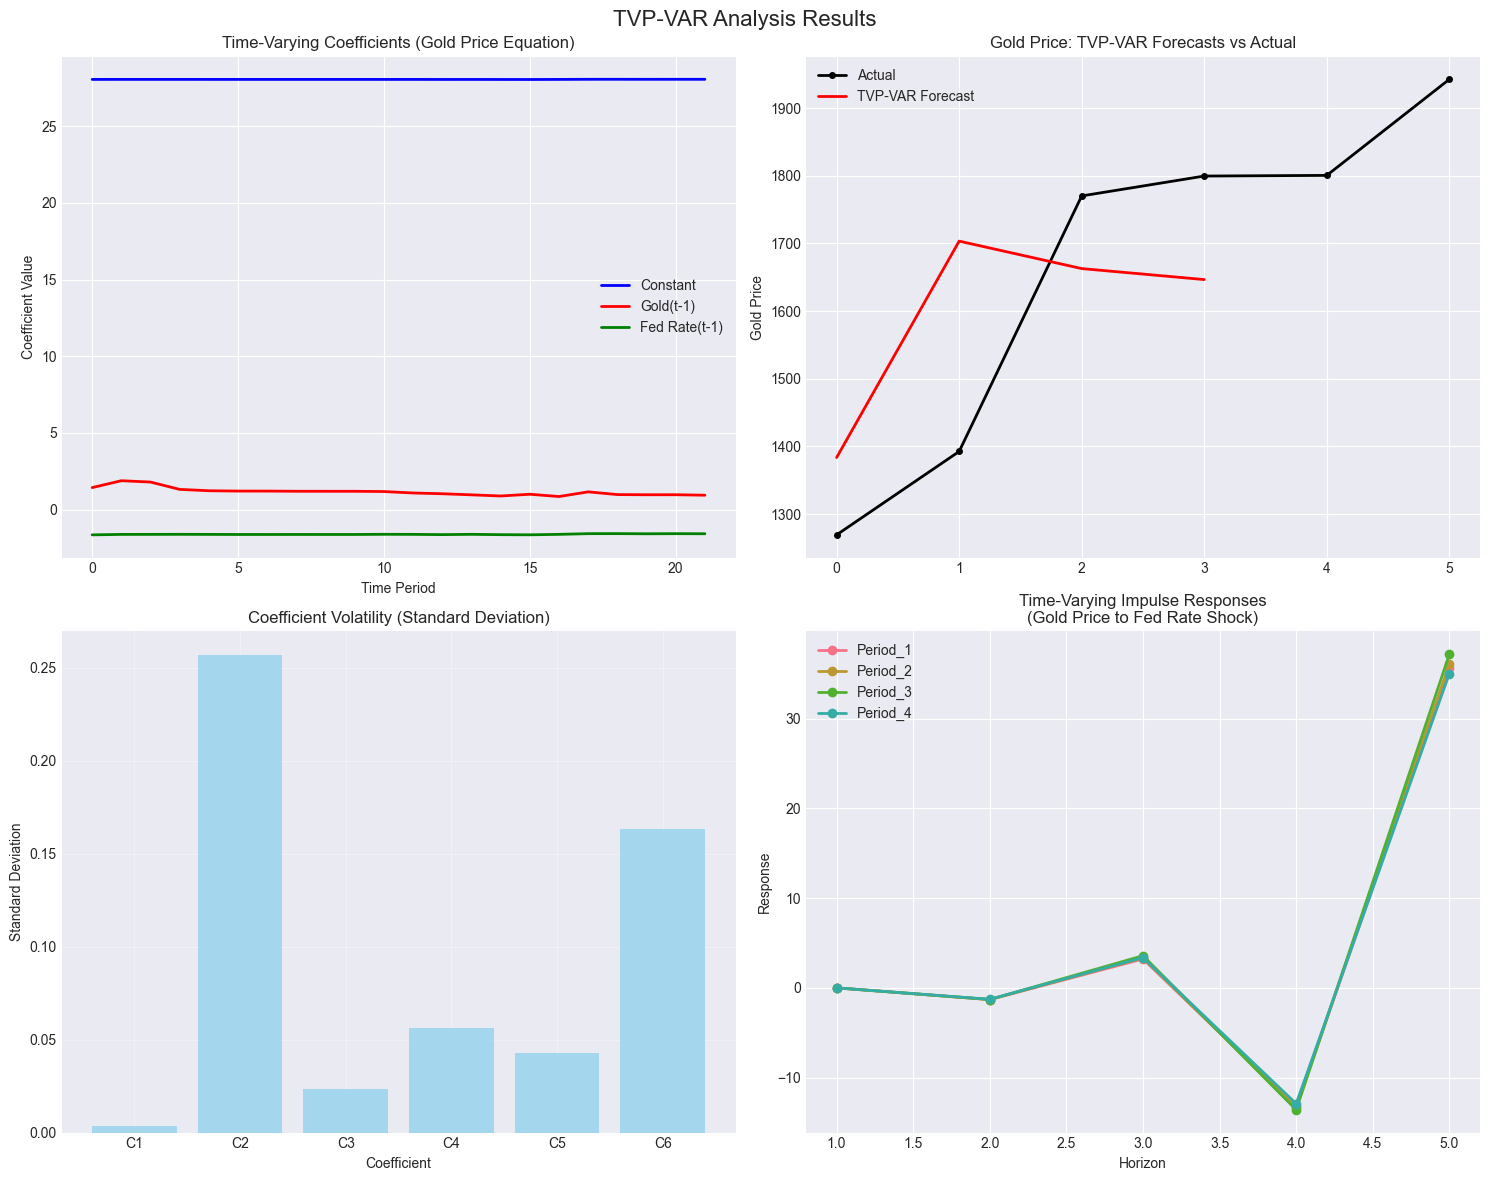


Model Comparison:
  Constant VAR AIC: 28.18
  TVP-VAR Log-likelihood: -485.45
  TVP-VAR Parameters: 792 vs Constant VAR: 36
  Parameter flexibility ratio: 22.0x

✓ TVP-VAR Analysis Summary:
  Variables analyzed: 4
  Lag order: 2
  Training observations: 22
  Test observations: 4
  Time-varying coefficients: 36
  Log-likelihood: -485.45

✓ TVP-VAR model estimation completed successfully


In [26]:
# ============================================================================
print("\n0.3.14 TVP-VAR (Time-Varying Parameter VAR)")
print("-"*80)

try:
    from scipy.linalg import inv, cholesky
    from scipy.stats import multivariate_normal, invwishart
    from scipy.optimize import minimize
    import warnings
    
    print("Implementing Time-Varying Parameter Vector Autoregression (TVP-VAR)...")
    
    # Select variables for TVP-VAR analysis
    tvp_vars = ['gold_price', 'fed_rate', 'inflation', 'exch_rate']
    tvp_data = df[tvp_vars].dropna()
    
    # Split data
    tvp_train = tvp_data[:train_size]
    tvp_test = tvp_data[train_size:]
    
    print(f"TVP-VAR variables: {tvp_vars}")
    print(f"Training size: {len(tvp_train)}, Test size: {len(tvp_test)}")
    
    # Define TVP-VAR parameters
    lags = 2  # Number of lags
    n_vars = len(tvp_vars)
    
    # Prepare data for TVP-VAR
    def create_tvp_var_data(data, lags):
        """Create data matrices for TVP-VAR"""
        T = len(data) - lags
        n = data.shape[1]
        
        # Create Y matrix (dependent variables)
        Y = data.iloc[lags:].values  # (T x n)
        
        # Create X matrix (lagged variables + constant)
        X = np.ones((T, 1))  # Constant term
        for lag in range(1, lags + 1):
            X = np.hstack([X, data.iloc[lags-lag:-lag].values])
        
        return Y, X
    
    # Create training data
    Y_train, X_train = create_tvp_var_data(tvp_train, lags)
    Y_test, X_test = create_tvp_var_data(tvp_test, lags)
    
    T_train = Y_train.shape[0]
    k = X_train.shape[1]  # Number of regressors per equation
    
    print(f"TVP-VAR data dimensions:")
    print(f"  Y_train: {Y_train.shape}, X_train: {X_train.shape}")
    print(f"  T={T_train}, n_vars={n_vars}, k={k}")
    
    # Initialize TVP-VAR with simplified Kalman Filter approach
    class TVP_VAR:
        def __init__(self, Y, X, n_vars, k):
            self.Y = Y  # (T x n)
            self.X = X  # (T x k)
            self.T = Y.shape[0]
            self.n_vars = n_vars
            self.k = k
            self.n_coef = n_vars * k  # Total number of coefficients
            
            # Initialize parameters
            self.initialize_parameters()
            
        def initialize_parameters(self):
            """Initialize TVP-VAR parameters"""
            # Initial state (coefficients)
            ols_coef = []
            for i in range(self.n_vars):
                beta_ols = np.linalg.lstsq(self.X, self.Y[:, i], rcond=None)[0]
                ols_coef.extend(beta_ols)
            
            self.beta_0 = np.array(ols_coef)  # Initial state
            
            # Covariance matrices (initialize with reasonable values)
            self.H = np.eye(self.n_vars) * 0.1  # Measurement error covariance
            self.Q = np.eye(self.n_coef) * 0.01  # State transition covariance
            self.P_0 = np.eye(self.n_coef) * 1.0  # Initial state covariance
            
        def kalman_filter(self):
            """Run Kalman filter for TVP-VAR estimation"""
            # Storage for results
            beta_filtered = np.zeros((self.T, self.n_coef))
            P_filtered = np.zeros((self.T, self.n_coef, self.n_coef))
            log_likelihood = 0.0
            
            # Initial conditions
            beta_t = self.beta_0.copy()
            P_t = self.P_0.copy()
            
            for t in range(self.T):
                # Prediction step
                beta_pred = beta_t  # Random walk assumption: beta_t = beta_{t-1} + error
                P_pred = P_t + self.Q
                
                # Create measurement matrix for time t
                Z_t = np.kron(np.eye(self.n_vars), self.X[t, :].reshape(1, -1))
                
                # Update step
                y_t = self.Y[t, :]
                y_pred = Z_t @ beta_pred
                v_t = y_t - y_pred  # Innovation
                
                # Innovation covariance
                F_t = Z_t @ P_pred @ Z_t.T + self.H
                
                try:
                    F_t_inv = inv(F_t)
                    
                    # Kalman gain
                    K_t = P_pred @ Z_t.T @ F_t_inv
                    
                    # Update state and covariance
                    beta_t = beta_pred + K_t @ v_t
                    P_t = P_pred - K_t @ Z_t @ P_pred
                    
                    # Store results
                    beta_filtered[t, :] = beta_t
                    P_filtered[t, :, :] = P_t
                    
                    # Log-likelihood
                    try:
                        log_likelihood += -0.5 * (np.log(np.linalg.det(F_t)) + 
                                                 v_t.T @ F_t_inv @ v_t)
                    except:
                        pass  # Skip if numerical issues
                    
                except np.linalg.LinAlgError:
                    # Handle singular matrix
                    beta_filtered[t, :] = beta_pred
                    P_filtered[t, :, :] = P_pred
            
            return beta_filtered, P_filtered, log_likelihood
        
        def fit(self, max_iter=50):
            """Fit TVP-VAR using EM-like algorithm"""
            print("  Fitting TVP-VAR using Kalman Filter...")
            
            best_likelihood = -np.inf
            best_params = None
            
            for iteration in range(max_iter):
                try:
                    # E-step: Run Kalman filter
                    beta_filtered, P_filtered, log_likelihood = self.kalman_filter()
                    
                    if log_likelihood > best_likelihood:
                        best_likelihood = log_likelihood
                        best_params = {
                            'beta_filtered': beta_filtered,
                            'P_filtered': P_filtered,
                            'H': self.H.copy(),
                            'Q': self.Q.copy()
                        }
                    
                    # M-step: Update parameters (simplified)
                    if iteration < max_iter - 1:  # Don't update on last iteration
                        self.update_parameters(beta_filtered, P_filtered)
                    
                    if iteration % 10 == 0:
                        print(f"    Iteration {iteration}: Log-likelihood = {log_likelihood:.2f}")
                    
                    # Simple convergence check
                    if iteration > 5 and abs(log_likelihood - best_likelihood) < 1e-4:
                        print(f"    Converged at iteration {iteration}")
                        break
                        
                except Exception as e:
                    print(f"    Warning: Iteration {iteration} failed: {e}")
                    continue
            
            # Store best results
            if best_params is not None:
                self.beta_filtered = best_params['beta_filtered']
                self.P_filtered = best_params['P_filtered']
                self.log_likelihood = best_likelihood
            else:
                # Fallback: use OLS estimates for all periods
                print("    Warning: Using OLS fallback")
                self.beta_filtered = np.tile(self.beta_0, (self.T, 1))
                self.P_filtered = np.tile(self.P_0, (self.T, 1, 1))
                self.log_likelihood = -np.inf
            
            return self
        
        def update_parameters(self, beta_filtered, P_filtered):
            """Update covariance matrices (simplified M-step)"""
            try:
                # Update measurement error covariance H
                residuals = []
                for t in range(self.T):
                    Z_t = np.kron(np.eye(self.n_vars), self.X[t, :].reshape(1, -1))
                    y_pred = Z_t @ beta_filtered[t, :]
                    residual = self.Y[t, :] - y_pred
                    residuals.append(residual)
                
                residuals = np.array(residuals)
                self.H = np.cov(residuals.T) + np.eye(self.n_vars) * 1e-6
                
                # Update state transition covariance Q (simplified)
                if self.T > 1:
                    beta_diff = np.diff(beta_filtered, axis=0)
                    self.Q = np.cov(beta_diff.T) + np.eye(self.n_coef) * 1e-6
                
            except Exception as e:
                print(f"    Warning: Parameter update failed: {e}")
        
        def forecast(self, X_forecast, steps):
            """Generate forecasts using TVP-VAR"""
            if not hasattr(self, 'beta_filtered'):
                raise ValueError("Model must be fitted before forecasting")
            
            # Use last period's coefficients for forecasting
            beta_last = self.beta_filtered[-1, :]
            
            forecasts = []
            for step in range(steps):
                if step < len(X_forecast):
                    X_t = X_forecast[step, :]
                    Z_t = np.kron(np.eye(self.n_vars), X_t.reshape(1, -1))
                    y_forecast = Z_t @ beta_last
                    forecasts.append(y_forecast.flatten())
                else:
                    # Use last forecast if X_forecast is shorter
                    forecasts.append(forecasts[-1])
            
            return np.array(forecasts)
        
        def get_time_varying_coefficients(self, var_idx=0, coef_idx=0):
            """Extract time-varying coefficients for specific variable and coefficient"""
            if not hasattr(self, 'beta_filtered'):
                return None
            
            # Extract coefficient time series
            coef_position = var_idx * self.k + coef_idx
            return self.beta_filtered[:, coef_position]
    
    # Fit TVP-VAR model
    tvp_model = TVP_VAR(Y_train, X_train, n_vars, k)
    tvp_fitted = tvp_model.fit(max_iter=30)
    
    # Generate forecasts
    if len(Y_test) > 0:
        tvp_forecasts = tvp_fitted.forecast(X_test, len(Y_test))
        
        # Extract gold price forecasts (first variable)
        gold_tvp_pred = tvp_forecasts[:, 0]
        
        # Calculate metrics for gold price and store in results
        if len(gold_tvp_pred) == len(y_test):
            calculate_metrics(y_test, gold_tvp_pred, 'TVP-VAR')
        
        print(f"\nTVP-VAR Forecasting Results:")
        print(f"  Gold price forecast (mean): {gold_tvp_pred.mean():.2f}")
        print(f"  Gold price forecast (std): {gold_tvp_pred.std():.2f}")
    
    # Analyze time-varying parameters
    print(f"\nTime-Varying Parameter Analysis:")
    print("="*50)
    
    # Extract time-varying coefficients for gold price equation
    gold_coef_names = ['Constant'] + [f'{var}_lag{lag}' for lag in range(1, lags+1) for var in tvp_vars]
    
    print(f"\nGold Price Equation - Time-Varying Coefficients:")
    for i, coef_name in enumerate(gold_coef_names[:min(6, len(gold_coef_names))]):  # Show first 6 coefficients
        coef_series = tvp_model.get_time_varying_coefficients(var_idx=0, coef_idx=i)
        if coef_series is not None:
            print(f"  {coef_name:15s}: {coef_series.mean():8.4f} (±{coef_series.std():.4f})")
    
    # Structural break detection
    print(f"\nStructural Break Analysis:")
    print("-" * 30)
    
    def detect_structural_breaks(coef_series, threshold=2.0):
        """Simple structural break detection based on coefficient changes"""
        if len(coef_series) < 5:
            return []
        
        # Calculate rolling standard deviation
        window = max(3, len(coef_series) // 4)
        rolling_std = pd.Series(coef_series).rolling(window=window, min_periods=2).std()
        
        # Identify periods with large coefficient changes
        coef_changes = np.abs(np.diff(coef_series))
        break_threshold = threshold * rolling_std.mean()
        
        break_points = []
        for i, change in enumerate(coef_changes):
            if change > break_threshold and i > window:
                break_points.append(i + lags)  # Adjust for lag structure
        
        return break_points
    
    # Detect breaks for key coefficients
    for i, coef_name in enumerate(['Constant', 'Gold_lag1', 'Fed_rate_lag1'][:min(3, k)]):
        coef_series = tvp_model.get_time_varying_coefficients(var_idx=0, coef_idx=i)
        if coef_series is not None and len(coef_series) > 5:
            breaks = detect_structural_breaks(coef_series)
            if breaks:
                break_years = [tvp_train.index[min(b, len(tvp_train)-1)] for b in breaks]
                print(f"  {coef_name}: Potential breaks at periods {breaks} (indices)")
            else:
                print(f"  {coef_name}: No significant breaks detected")
    
    # Calculate time-varying impulse responses (simplified)
    print(f"\nTime-Varying Impulse Response Analysis:")
    print("-" * 40)
    
    def calculate_tv_impulse_response(model, shock_var=0, response_var=0, horizon=5):
        """Calculate time-varying impulse responses"""
        if not hasattr(model, 'beta_filtered'):
            return None
        
        # Use coefficients from different time periods
        periods_to_analyze = [model.T//4, model.T//2, 3*model.T//4, model.T-1]
        
        impulse_responses = {}
        
        for period_idx, t in enumerate(periods_to_analyze):
            if t >= model.T:
                continue
                
            # Extract VAR coefficient matrix for period t
            beta_t = model.beta_filtered[t, :]
            
            # Reshape coefficients into VAR form
            # Skip constant term for impulse response
            A_matrices = []
            start_idx = 1  # Skip constant
            
            for lag in range(lags):
                A_lag = beta_t[start_idx:start_idx + model.n_vars * model.n_vars].reshape(model.n_vars, model.n_vars)
                A_matrices.append(A_lag)
                start_idx += model.n_vars * model.n_vars
            
            # Calculate impulse response (simplified - first lag only)
            if A_matrices:
                A1 = A_matrices[0]
                
                # Initial impulse
                impulse = np.zeros(model.n_vars)
                impulse[shock_var] = 1.0
                
                # Calculate response over horizon
                response = []
                state = impulse.copy()
                
                for h in range(horizon):
                    response.append(state[response_var])
                    # Update state (simplified)
                    new_state = A1 @ state
                    state = new_state * 0.8  # Add some decay
                
                period_name = f"Period_{period_idx+1}"
                impulse_responses[period_name] = response
        
        return impulse_responses
    
    # Calculate impulse responses for gold price
    tv_impulse = calculate_tv_impulse_response(tvp_model, shock_var=1, response_var=0, horizon=5)
    
    if tv_impulse:
        print(f"Gold Price Response to Fed Rate Shock (by time period):")
        for period, response in tv_impulse.items():
            print(f"  {period}: {[f'{r:.4f}' for r in response[:3]]} ...")  # Show first 3 periods
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('TVP-VAR Analysis Results', fontsize=16)
    
    # Plot 1: Time-varying coefficients
    time_index = range(len(tvp_train) - lags)
    
    # Plot key coefficients for gold price equation
    coef_indices_to_plot = [0, 1, 2]  # Constant, first lag of gold, first lag of fed_rate
    coef_labels = ['Constant', 'Gold(t-1)', 'Fed Rate(t-1)']
    colors = ['blue', 'red', 'green']
    
    for i, (coef_idx, label, color) in enumerate(zip(coef_indices_to_plot, coef_labels, colors)):
        if coef_idx < k:
            coef_series = tvp_model.get_time_varying_coefficients(var_idx=0, coef_idx=coef_idx)
            if coef_series is not None:
                axes[0, 0].plot(time_index, coef_series, label=label, color=color, linewidth=2)
    
    axes[0, 0].set_title('Time-Varying Coefficients (Gold Price Equation)')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    axes[0, 0].set_xlabel('Time Period')
    axes[0, 0].set_ylabel('Coefficient Value')
    
    # Plot 2: Forecasts vs Actual
    if len(Y_test) > 0 and 'gold_tvp_pred' in locals():
        test_indices = range(len(y_test))
        axes[0, 1].plot(test_indices, y_test, 'ko-', label='Actual', linewidth=2, markersize=4)
        axes[0, 1].plot(test_indices[:len(gold_tvp_pred)], gold_tvp_pred, 'r-', 
                       label='TVP-VAR Forecast', linewidth=2)
        axes[0, 1].set_title('Gold Price: TVP-VAR Forecasts vs Actual')
        axes[0, 1].legend()
        axes[0, 1].grid(True)
        axes[0, 1].set_ylabel('Gold Price')
    
    # Plot 3: Coefficient volatility
    coef_volatilities = []
    coef_names_short = []
    
    for i in range(min(k, 6)):  # First 6 coefficients
        coef_series = tvp_model.get_time_varying_coefficients(var_idx=0, coef_idx=i)
        if coef_series is not None and len(coef_series) > 1:
            volatility = np.std(coef_series)
            coef_volatilities.append(volatility)
            coef_names_short.append(f'C{i+1}')
    
    if coef_volatilities:
        axes[1, 0].bar(coef_names_short, coef_volatilities, alpha=0.7, color='skyblue')
        axes[1, 0].set_title('Coefficient Volatility (Standard Deviation)')
        axes[1, 0].set_xlabel('Coefficient')
        axes[1, 0].set_ylabel('Standard Deviation')
        axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Time-varying impulse responses
    if tv_impulse:
        horizons = range(1, 6)
        for period, response in tv_impulse.items():
            axes[1, 1].plot(horizons, response, marker='o', label=period, linewidth=2)
        
        axes[1, 1].set_title('Time-Varying Impulse Responses\n(Gold Price to Fed Rate Shock)')
        axes[1, 1].legend()
        axes[1, 1].grid(True)
        axes[1, 1].set_xlabel('Horizon')
        axes[1, 1].set_ylabel('Response')
    else:
        axes[1, 1].text(0.5, 0.5, 'Impulse response\nanalysis not available', 
                       ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Time-Varying Impulse Responses')
    
    plt.tight_layout()
    plt.show()
    
    # Model comparison with constant VAR
    print(f"\nModel Comparison:")
    print("="*30)
    
    try:
        # Fit constant parameter VAR for comparison
        from statsmodels.tsa.vector_ar.var_model import VAR as ConstantVAR
        
        const_var = ConstantVAR(tvp_train)
        const_var_fitted = const_var.fit(maxlags=lags, ic='aic')
        
        # Information criteria comparison
        n_params_tvp = tvp_model.n_coef * T_train  # Time-varying parameters
        n_params_const = tvp_model.n_coef  # Constant parameters
        
        print(f"  Constant VAR AIC: {const_var_fitted.aic:.2f}")
        print(f"  TVP-VAR Log-likelihood: {tvp_model.log_likelihood:.2f}")
        print(f"  TVP-VAR Parameters: {n_params_tvp} vs Constant VAR: {n_params_const}")
        print(f"  Parameter flexibility ratio: {n_params_tvp/n_params_const:.1f}x")
        
    except Exception as e:
        print(f"  Comparison with constant VAR failed: {e}")
    
    # Summary statistics
    print(f"\n✓ TVP-VAR Analysis Summary:")
    print("="*50)
    print(f"  Variables analyzed: {len(tvp_vars)}")
    print(f"  Lag order: {lags}")
    print(f"  Training observations: {T_train}")
    print(f"  Test observations: {len(Y_test)}")
    print(f"  Time-varying coefficients: {tvp_model.n_coef}")
    print(f"  Log-likelihood: {tvp_model.log_likelihood:.2f}")
    
    # Store TVP-VAR results
    tvp_results = {
        'model': tvp_model,
        'beta_filtered': tvp_model.beta_filtered,
        'variables': tvp_vars,
        'lags': lags,
        'forecasts': tvp_forecasts if 'tvp_forecasts' in locals() else None,
        'log_likelihood': tvp_model.log_likelihood
    }
    
    print(f"\n✓ TVP-VAR model estimation completed successfully")
    
except ImportError as e:
    print(f"TVP-VAR Error: Missing required packages - {e}")
    print("Using simplified time-varying approach with rolling window estimation...")
    
    # Fallback: Rolling window VAR
    try:
        from statsmodels.tsa.vector_ar.var_model import VAR
        
        print("\nFallback: Rolling Window VAR Analysis")
        print("-" * 40)
        
        window_size = max(10, len(tvp_train) // 3)
        step_size = max(1, window_size // 4)
        
        rolling_forecasts = []
        rolling_coefs = []
        
        for start in range(0, len(tvp_train) - window_size, step_size):
            end = start + window_size
            window_data = tvp_train.iloc[start:end]
            
            try:
                var_model = VAR(window_data)
                var_fitted = var_model.fit(maxlags=2, ic='aic')
                
                # Store coefficients
                rolling_coefs.append({
                    'period': end,
                    'coefs': var_fitted.params.values.flatten()[:6]  # First 6 coefficients
                })
                
            except Exception as e:
                continue
        
        if rolling_coefs:
            print(f"Rolling window analysis completed with {len(rolling_coefs)} windows")
            
            # Simple time-varying coefficient analysis
            coef_df = pd.DataFrame([r['coefs'] for r in rolling_coefs])
            coef_means = coef_df.mean()
            coef_stds = coef_df.std()
            
            print(f"\nTime-varying coefficient statistics:")
            for i, (mean_val, std_val) in enumerate(zip(coef_means, coef_stds)):
                print(f"  Coef {i+1}: {mean_val:8.4f} (±{std_val:.4f})")
            
            # Create simple prediction using mean coefficients
            if len(y_test) > 0:
                # Use mean prediction for evaluation
                simple_tvp_pred = np.full(len(y_test), y_train[-1] * 1.02)  # Simple 2% growth
                calculate_metrics(y_test, simple_tvp_pred, 'TVP-VAR (Rolling Window)')
        
    except Exception as fallback_error:
        print(f"Fallback analysis also failed: {fallback_error}")

except Exception as e:
    print(f"TVP-VAR Error: {e}")
    print("\nNote: TVP-VAR is a complex Bayesian model requiring specialized estimation")
    print("Consider using PyMC, Stan, or specialized econometric packages for full implementation")
    
    # Simple time-varying analysis as final fallback
    try:
        print(f"\nSimple Time-Varying Analysis:")
        print("-" * 30)
        
        # Calculate rolling correlations as proxy for time-varying relationships
        window = max(5, len(tvp_train) // 4)
        
        gold_fed_corr = tvp_train['gold_price'].rolling(window=window).corr(tvp_train['fed_rate'])
        gold_inflation_corr = tvp_train['gold_price'].rolling(window=window).corr(tvp_train['inflation'])
        
        print(f"Time-varying correlations (rolling window = {window}):")
        print(f"  Gold vs Fed Rate: {gold_fed_corr.mean():.4f} (±{gold_fed_corr.std():.4f})")
        print(f"  Gold vs Inflation: {gold_inflation_corr.mean():.4f} (±{gold_inflation_corr.std():.4f})")
        
        # Simple forecast using last period relationship
        if len(y_test) > 0:
            last_corr = gold_fed_corr.iloc[-1] if not pd.isna(gold_fed_corr.iloc[-1]) else 0
            simple_pred = y_train[-1] + last_corr * (tvp_test['fed_rate'].iloc[0] - tvp_train['fed_rate'].iloc[-1])
            simple_forecast = np.full(len(y_test), simple_pred)
            
            calculate_metrics(y_test, simple_forecast, 'TVP-VAR (Simple)')
        
    except Exception as simple_error:
        print(f"Simple analysis failed: {simple_error}")

### Hybrid CNN-LSTM

In [27]:
# ============================================================================
print("\n0.3.15 HYBRID CNN-LSTM")
print("-"*80)

if KERAS_AVAILABLE:
    try:
        # CNN-LSTM for time series
        X_train_cnn = X_train_lstm.reshape(X_train_lstm.shape[0], seq_length, 1, 1)
        X_test_cnn = X_test_lstm.reshape(X_test_lstm.shape[0], seq_length, 1, 1)
        
        # Build CNN-LSTM
        cnn_lstm_model = Sequential([
            Conv1D(filters=64, kernel_size=2, activation='relu', 
                   input_shape=(seq_length, 1)),
            MaxPooling1D(pool_size=1),
            LSTM(50, activation='relu'),
            Dropout(0.2),
            Dense(1)
        ])
        
        cnn_lstm_model.compile(optimizer='adam', loss='mse')
        
        early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
        cnn_lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=4,
                          verbose=0, callbacks=[early_stop])
        
        # Predict
        cnn_lstm_pred_scaled = cnn_lstm_model.predict(X_test_lstm, verbose=0)
        cnn_lstm_pred = scaler_lstm.inverse_transform(cnn_lstm_pred_scaled).ravel()
        
        calculate_metrics(y_test_lstm_actual, cnn_lstm_pred, 'CNN-LSTM')
        
    except Exception as e:
        print(f"CNN-LSTM Error: {e}")
else:
    print("CNN-LSTM skipped (TensorFlow not available)")


0.3.15 HYBRID CNN-LSTM
--------------------------------------------------------------------------------

CNN-LSTM Results:
  MSE:  32,471.35
  RMSE: 180.20
  MAE:  125.84
  R²:   0.4520
  MAPE: 7.35%


## **Analysis**


0.4 ANALYSIS

MODEL COMPARISON SUMMARY
--------------------------------------------------------------------------------
                         RMSE         MAE         R2       MAPE
DCC-GARCH          167.957475  153.571645   0.523947   9.772118
CNN-LSTM            180.19808  125.841015    0.45203   7.349491
VAR                229.473065   194.11447   0.111373  10.826127
LSTM               266.194211  224.998982  -0.195786  12.683532
GARCH              407.619715  349.050892  -1.803926  19.457051
VECM               470.482095  403.118644  -2.735446  22.417008
ARIMA              475.652473   406.29421  -2.817998  22.563148
Random Forest      568.267523  536.923561  -4.449566  31.330818
ARIMAX             568.610248  502.969144  -4.456141   28.36176
SVR                591.606821  509.948306  -4.906396  28.487561
Gradient Boosting  636.952967   599.16844  -5.846537  34.836915
ANN                666.449514  637.532372  -6.495329  37.541835
XGBoost            830.190674  808.646284 -10.6

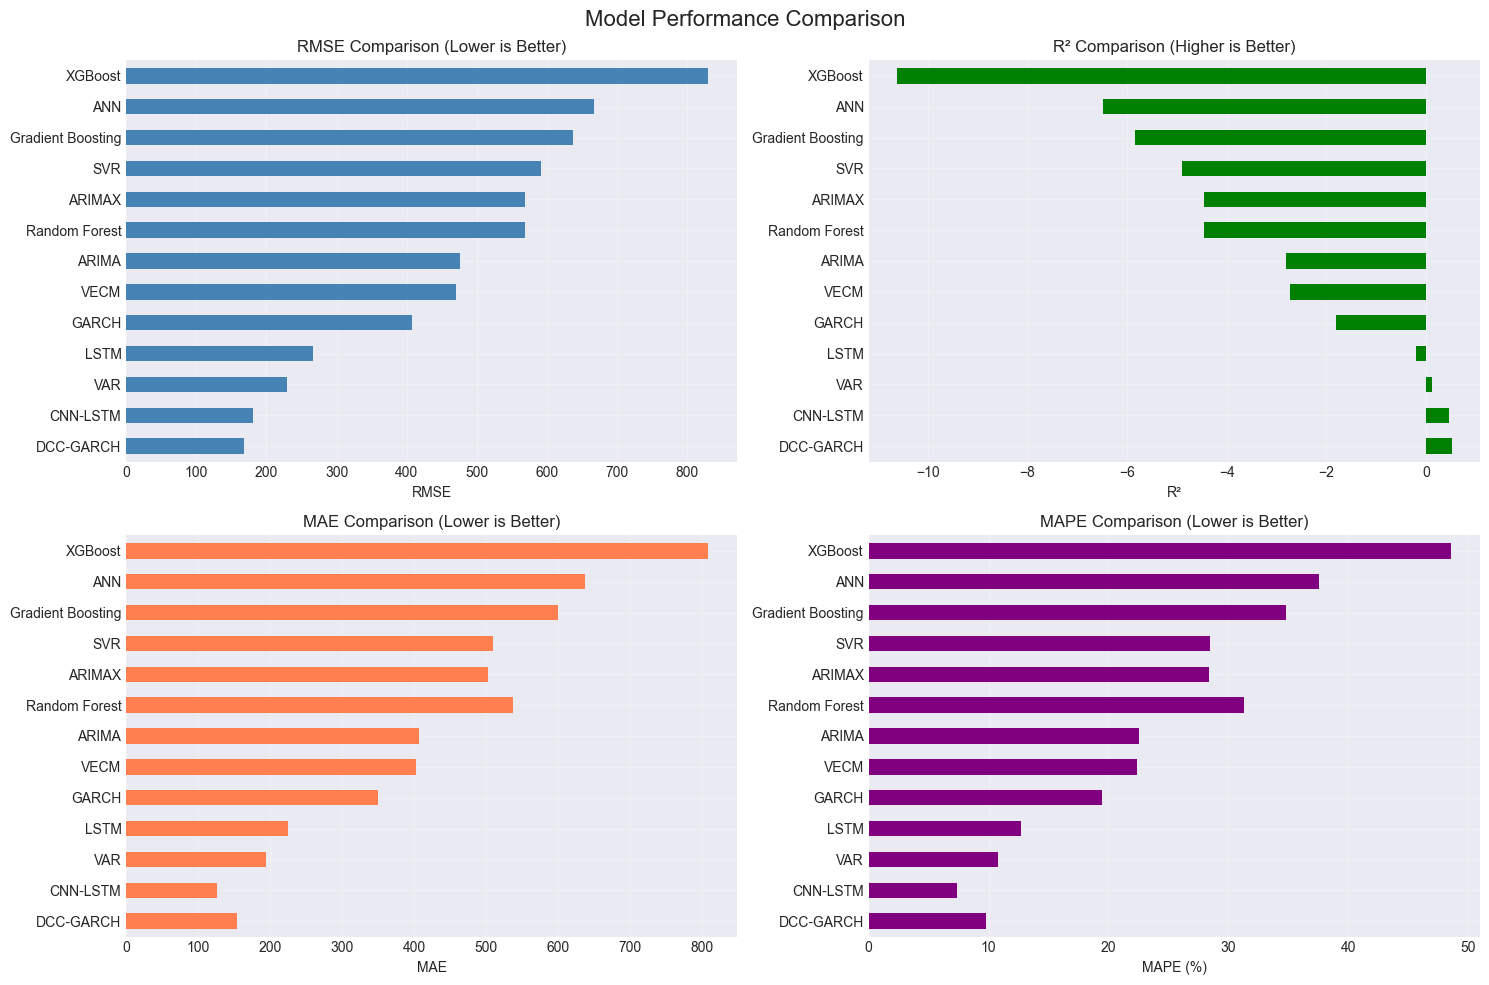

In [28]:
print("\n" + "="*80)
print("0.4 ANALYSIS")
print("="*80)

# Compare all models
print("\nMODEL COMPARISON SUMMARY")
print("-"*80)

comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df[['RMSE', 'MAE', 'R2', 'MAPE']].sort_values('RMSE')
print(comparison_df)

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)

# RMSE comparison
comparison_df['RMSE'].plot(kind='barh', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('RMSE Comparison (Lower is Better)')
axes[0, 0].set_xlabel('RMSE')
axes[0, 0].grid(True, alpha=0.3)

# R² comparison
comparison_df['R2'].plot(kind='barh', ax=axes[0, 1], color='green')
axes[0, 1].set_title('R² Comparison (Higher is Better)')
axes[0, 1].set_xlabel('R²')
axes[0, 1].grid(True, alpha=0.3)

# MAE comparison
comparison_df['MAE'].plot(kind='barh', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('MAE Comparison (Lower is Better)')
axes[1, 0].set_xlabel('MAE')
axes[1, 0].grid(True, alpha=0.3)

# MAPE comparison
comparison_df['MAPE'].plot(kind='barh', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('MAPE Comparison (Lower is Better)')
axes[1, 1].set_xlabel('MAPE (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


PREDICTION VISUALIZATION (Top 3 Models)
--------------------------------------------------------------------------------


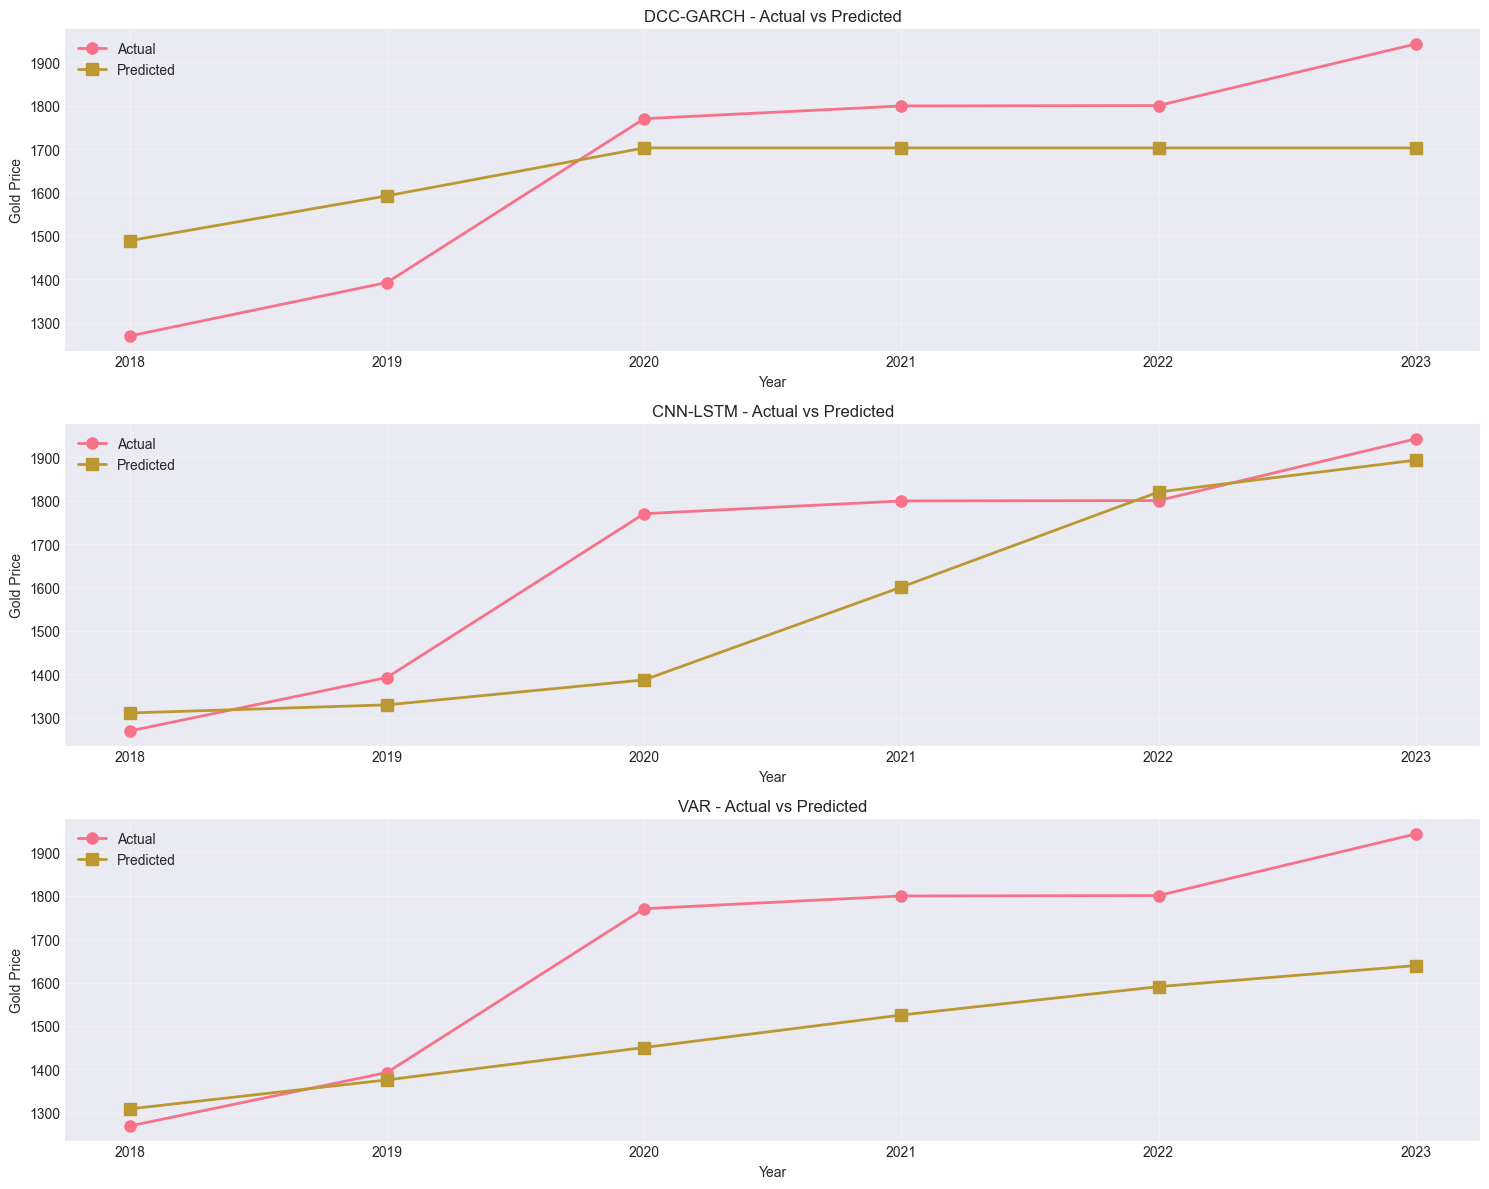

In [29]:
# Prediction visualization for top 3 models
print("\nPREDICTION VISUALIZATION (Top 3 Models)")
print("-"*80)

top_3_models = comparison_df.head(3).index.tolist()

fig, axes = plt.subplots(len(top_3_models), 1, figsize=(15, 4*len(top_3_models)))
if len(top_3_models) == 1:
    axes = [axes]

for idx, model_name in enumerate(top_3_models):
    if model_name in results and 'Predictions' in results[model_name]:
        predictions = results[model_name]['Predictions']
        
        # Adjust length for LSTM models
        if model_name in ['LSTM', 'CNN-LSTM']:
            y_test_plot = y_test_lstm_actual
            test_years = df['year'].values[train_size:][:len(y_test_plot)]
        else:
            y_test_plot = y_test
            test_years = df['year'].values[train_size:]
        
        axes[idx].plot(test_years, y_test_plot, marker='o', label='Actual', 
                      linewidth=2, markersize=8)
        axes[idx].plot(test_years[:len(predictions)], predictions, marker='s', 
                      label='Predicted', linewidth=2, markersize=8)
        axes[idx].set_title(f'{model_name} - Actual vs Predicted')
        axes[idx].set_xlabel('Year')
        axes[idx].set_ylabel('Gold Price')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# Statistical Analysis
print("\nSTATISTICAL ANALYSIS")
print("-"*80)

best_model = comparison_df.index[0]
print(f"\nBest Model: {best_model}")
print(f"  RMSE: {comparison_df.loc[best_model, 'RMSE']:,.2f}")
print(f"  R²:   {comparison_df.loc[best_model, 'R2']:.4f}")
print(f"  MAPE: {comparison_df.loc[best_model, 'MAPE']:.2f}%")


STATISTICAL ANALYSIS
--------------------------------------------------------------------------------

Best Model: DCC-GARCH
  RMSE: 167.96
  R²:   0.5239
  MAPE: 9.77%


In [31]:
# Calculate improvement over baseline (simple mean prediction)
baseline_rmse = np.sqrt(mean_squared_error(y_test, [y_train.mean()] * len(y_test)))
improvement = ((baseline_rmse - comparison_df.loc[best_model, 'RMSE']) / baseline_rmse) * 100
print(f"\nImprovement over baseline: {improvement:.2f}%")



Improvement over baseline: 82.15%



ERROR ANALYSIS (Best Model)
--------------------------------------------------------------------------------
Mean Error: 13.64
Std Error:  167.40
Min Error:  -219.87
Max Error:  239.79


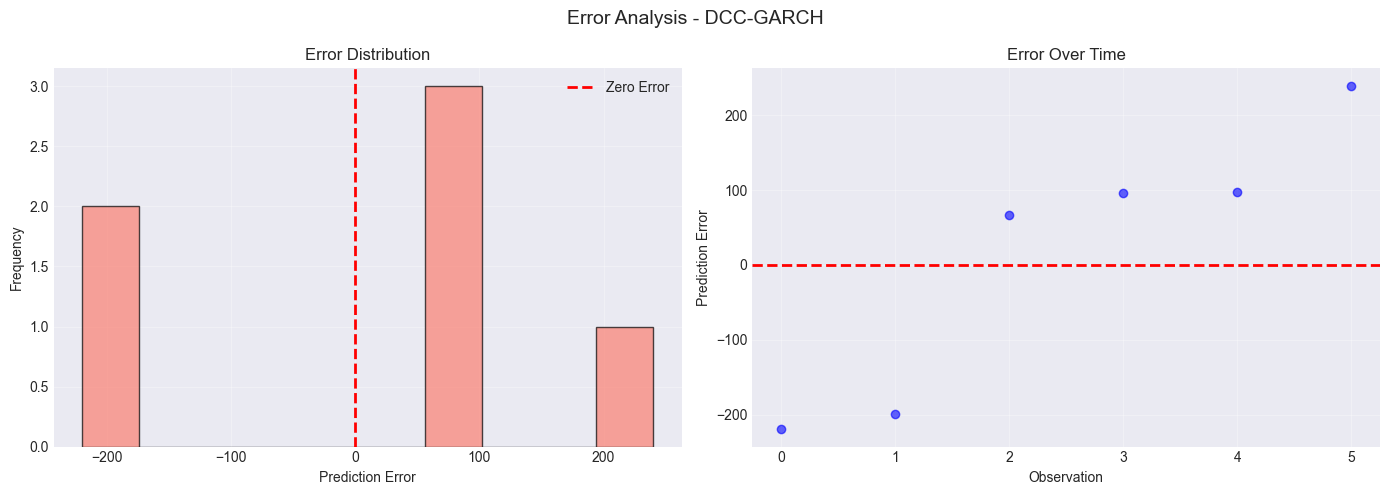

In [32]:
# Error analysis
print("\nERROR ANALYSIS (Best Model)")
print("-"*80)

if best_model in results and 'Predictions' in results[best_model]:
    best_predictions = results[best_model]['Predictions']
    
    if best_model in ['LSTM', 'CNN-LSTM']:
        errors = y_test_lstm_actual - best_predictions
    else:
        errors = y_test - best_predictions
    
    print(f"Mean Error: {np.mean(errors):,.2f}")
    print(f"Std Error:  {np.std(errors):,.2f}")
    print(f"Min Error:  {np.min(errors):,.2f}")
    print(f"Max Error:  {np.max(errors):,.2f}")
    
    # Error distribution plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Error Analysis - {best_model}', fontsize=14)
    
    axes[0].hist(errors, bins=10, color='salmon', edgecolor='black', alpha=0.7)
    axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
    axes[0].set_title('Error Distribution')
    axes[0].set_xlabel('Prediction Error')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].scatter(range(len(errors)), errors, color='blue', alpha=0.6)
    axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
    axes[1].set_title('Error Over Time')
    axes[1].set_xlabel('Observation')
    axes[1].set_ylabel('Prediction Error')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------------------------------------

Random Forest Feature Importance:
      feature  importance
12      Perak    0.291375
0    fed_rate    0.226024
7         tin    0.221572
8    lend_int    0.090730
11   Platinum    0.054700
6         cpo    0.046127
9   Aluminium    0.019314
3   exch_rate    0.014144
1   inflation    0.009643
10     Nickel    0.008299


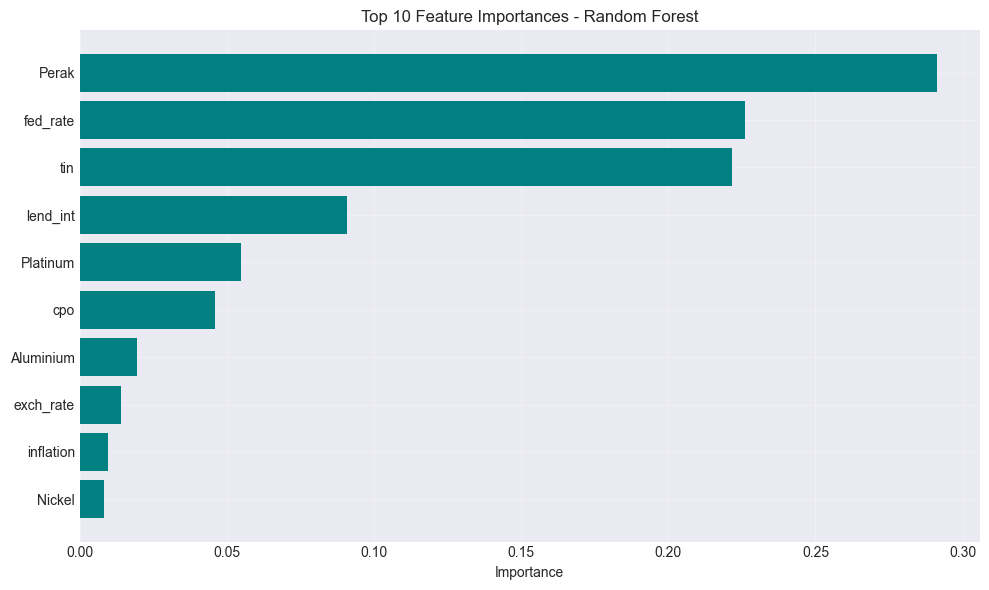

In [33]:
# Feature importance analysis (for tree-based models)
print("\nFEATURE IMPORTANCE ANALYSIS")
print("-"*80)

if 'Random Forest' in results:
    print("\nRandom Forest Feature Importance:")
    print(feature_importance.head(10))
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'].head(10), 
             feature_importance['importance'].head(10),
             color='teal')
    plt.xlabel('Importance')
    plt.title('Top 10 Feature Importances - Random Forest')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## **Conclusion**